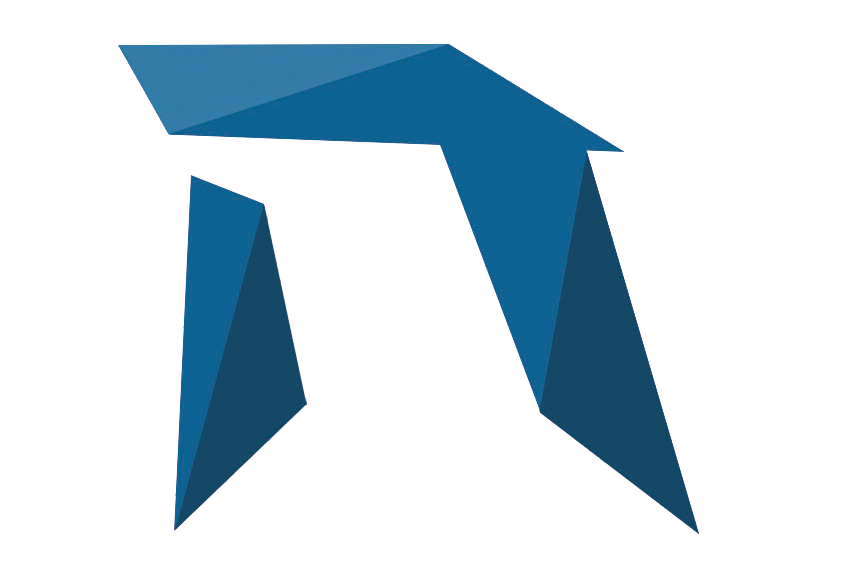

***
# HEICODERS ACADEMY
<b>AI200: Applied Machine Learning</b><br>
***
<b>Capstone Project:</b> Kaggle Dataset Walkthrough 
***

<b>Dataset Used:</b>

- Human or Robot Dataset (Facebook Recruitment Challenge) from Kaggle

1.Understanding the Dataset
===
***

## 1a. Import Dataset

We import the dataset using <code>read_csv()</code>

In [1]:
import pandas as pd

bids_df = pd.read_csv('data/bids.csv')
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

## 1b. How many rows/columns in each dataset?

To check this, we identify the dimensionality of the data using <code>.shape</code>

In [2]:
print(train_df.shape)
print(test_df.shape)
print(bids_df.shape)

(2013, 4)
(4700, 3)
(7656334, 9)


## 1c. How does each dataset look like?

Next, we apply <code>.head()</code> to each of the dataset to understand the specific nature of data each of them contains.

In [3]:
train_df.head()

,bidder_id,payment_account,address,outcome
0,4a791121f1d9c9c192d13051301984388c491,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,6feeeab451fcc546e1c43867e04bd5d2294fc,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,3b4586382b3ff164e8bad37b15a268a540996,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [4]:
test_df.head()

,bidder_id,payment_account,address
0,b892f38403f2cc95c1ba1bf4f3b46d89505ea,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,77849f7bfc8bf29c595b50d3640bee1f2189b,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,ef3e34da1e7470d99ed3ce8617e24b6b4541f,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,7aeb6c9fda0c521f54111c47737e17543aaca,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,6394924262e3b28e89822b95b170cde4240d8,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


In [5]:
bids_df.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,c6faf9e526c72bc8383f2bc4417a465d2fa27,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,d96e93359ed70b7b4eebac163f448afeb50dc,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,065bdcc596308d1fdd0014261d6e198aa138e,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,e97aa310037dd210f52b5b164077a926bb5de,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,41a7f56fcc5771d305baa6e989fb2e8cceb21,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


## 1d. Important note on bidder_id: some bidders do not have bid history in bids.csv

We use the <code>.nunique()</code> to see the unique bidder IDs in each dataset. Through this, we can see that some of the bidders do not have any bid history in bids.csv

print(train_df.bidder_id.nunique())
print(test_df.bidder_id.nunique())
print(bids_df.bidder_id.nunique())

train_bidder_ids = list(train_df.bidder_id)
test_bidder_ids = list(test_df.bidder_id)
bids_bidder_ids = list(bids_df.bidder_id.unique())

<!-- print(train_bidder_ids[:5]) -->

not_found = []
for bidderid in train_bidder_ids:
    if bidderid not in bids_bidder_ids:
        not_found.append(bidderid)
<!-- print(len(not_found), 'bidder ids from train.csv are not found in bids.csv') -->

not_found = []
for bidderid in test_bidder_ids:
    if bidderid not in bids_bidder_ids:
        not_found.append(bidderid)
<!-- print(len(not_found), 'bidder ids from test.csv are not found in bids.csv') -->

In [6]:
url_counts = bids_df.groupby("url").nunique()
url_counts.value_counts

<bound method DataFrame.value_counts of                  bid_id  bidder_id  auction  merchandise  device  time  \
url                                                                      
00018jv10bfpamj       1          1        1            1       1     1   
0004ol1xqaacb1i       1          1        1            1       1     1   
0004p492iser04c       1          1        1            1       1     1   
0006rggh5wbol5p       1          1        1            1       1     1   
0007zqw4d25fucy       3          1        1            1       3     3   
...                 ...        ...      ...          ...     ...   ...   
zzzxmri6opgbwms       1          1        1            1       1     1   
zzzxpv4hcb0t45c       2          1        2            1       1     2   
zzzyacx97kqgj9i       1          1        1            1       1     1   
zzzyqvb5s4bk67y       1          1        1            1       1     1   
zzzzs4vfq9tfa1y       1          1        1            1       1     1  

2.Feature Engineering
===
***

## 2a. Simple Data Aggregation example (one feature) with `.count()`

We make use of <code>groupby()</code> and <code>count()</code> to generate new and interesting data

In [7]:
import numpy as np

bidder_counts = bids_df.groupby("bidder_id")['time'].count().reset_index()
bidder_counts = bidder_counts.rename(columns={'time':'num_bids'})
bidder_counts['log_num_bids'] = (bidder_counts['num_bids']+1).transform(np.log)
bidder_counts

,bidder_id,num_bids,log_num_bids
0,0013f9b8d1f462df4462e1c1216e441ba6e18,8,2.197225
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,7,2.079442
2,002828f800c5132e297cfe3d44fbde9aeac51,2,1.098612
3,00402f50c4086f320cb6bf94f04462ea32441,249,5.521461
4,0040cea6b93afd86768c365d89513ffb7c0ba,31,3.465736
...,...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,168,5.129899
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,5,1.791759
6611,ffde8717e9a547d536a4e9c3f44782829c021,24,3.218876
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,3,1.386294


In [264]:
from statistics import mean , median 
from scipy.stats import entropy

entropy_ips_per_auc = bids_df.groupby("bidder_id")

def ips_entropy_auc(group):

    auc_dict = {}
    ip_list = []
    for row_index, row in group.iterrows():
        ip = row['ip']
        auction = row['auction']
        
        if ip not in ip_list:
            ip_list.append(ip)
        
        if auction not in auc_dict:
            auc_dict[auction] = [ip]
        elif ip not in auc_dict[auction]:
            auc_dict[auction] += [ip]
    
    ip_count_per_auc = []
    for ips in auc_dict.values():
        ip_count_per_auc.append(len(ips))
    
    ip_percent_list = []
    
    for ip_count in ip_count_per_auc:
        
        percent = ip_count/len(ip_list)   
        ip_percent_list.append(percent)
    
#     print(ip_percent_list)
    bid_entropy = entropy(ip_percent_list)

    return bid_entropy

# def time_diff_func(group):
    
#     for index in group.time:
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

ips_entropy_per_auc = entropy_ips_per_auc.apply(ips_entropy_auc)

In [267]:
ips_entropy_per_auc = pd.DataFrame(ips_entropy_per_auc)
ips_entropy_per_auc = ips_entropy_per_auc.rename(columns={0:'ips_entropy_per_auc'})
ips_entropy_per_auc = ips_entropy_per_auc.reset_index()
ips_entropy_per_auc['log_ips_entropy_per_auc'] = (ips_entropy_per_auc['ips_entropy_per_auc']+1).transform(np.log)
ips_entropy_per_auc

,level_0,index,bidder_id,ips_entropy_per_auc,log_ips_entropy_per_auc
0,0,0,0013f9b8d1f462df4462e1c1216e441ba6e18,1.667462,0.981127
1,1,1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,1.945910,1.080418
2,2,2,002828f800c5132e297cfe3d44fbde9aeac51,0.693147,0.526589
3,3,3,00402f50c4086f320cb6bf94f04462ea32441,3.676675,1.542587
4,4,4,0040cea6b93afd86768c365d89513ffb7c0ba,3.060287,1.401254
...,...,...,...,...,...
6609,6609,6609,ffd49be672b1ba493b07dccf29311045c5392,2.036557,1.110724
6610,6610,6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,1.332179,0.846803
6611,6611,6611,ffde8717e9a547d536a4e9c3f44782829c021,2.600431,1.281054
6612,6612,6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,1.098612,0.741276


In [ ]:
from statistics import mean , median 
from scipy.stats import entropy

entropy_auc = bids_df.groupby("bidder_id")

def bid_entropy_per_auc(group):

    auc_dict = {}
    total_bids = 0
    for row_index, row in group.iterrows():
        total_bids += 1
        auction = row['auction']
        
        if auction not in auc_dict:
            auc_dict[auction] = 1
        else:
            auc_dict[auction] += 1
            
    auction_percent_list = []
    
    for auc_bids in auc_dict.values():
        
        percent = auc_bids/total_bids   
        auction_percent_list.append(percent)
    
#     print(ip_percent_list)
    bid_entropy = entropy(auction_percent_list)

    return bid_entropy

# def time_diff_func(group):
    
#     for index in group.time:
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

auc_entropy = entropy_auc.apply(bid_entropy_per_auc)

In [241]:
bids_entropy_auc = pd.DataFrame(auc_entropy)
bids_entropy_auc = bids_entropy_auc.rename(columns={0:'bids_entropy_auc'})
bids_entropy_auc = bids_entropy_auc.reset_index()
bids_entropy_auc['log_bids_entropy_auc'] = (bids_entropy_auc['bids_entropy_auc']+1).transform(np.log)


In [8]:
from statistics import mean , median 
from scipy.stats import entropy

entropy_country = bids_df.groupby("bidder_id")

def bid_entropy_per_country(group):

    coun_dict = {}
    total_bids = 0
    for row_index, row in group.iterrows():
        total_bids += 1
        country = row['country']
        
        if country not in coun_dict:
            coun_dict[country] = 1
        else:
            coun_dict[country] += 1
            
    country_percent_list = []
    
    for url_bids in coun_dict.values():
        
        percent = url_bids/total_bids   
        country_percent_list.append(percent)
    
#     print(ip_percent_list)
    bid_entropy = entropy(country_percent_list)

    return bid_entropy

# def time_diff_func(group):
    
#     for index in group.time:
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

grace = entropy_country.apply(bid_entropy_per_country)

In [9]:
bids_entropy_coun = pd.DataFrame(grace)
bids_entropy_coun = bids_entropy_coun.rename(columns={0:'bids_entropy_country'})
bids_entropy_coun = bids_entropy_coun.reset_index()
bids_entropy_coun_diff = train_df[['bidder_id','outcome']].merge(bids_entropy_coun,on = 'bidder_id',how='left' )
bids_entropy_coun_diff

,bidder_id,outcome,bids_entropy_country
0,4a791121f1d9c9c192d13051301984388c491,0.0,1.337882
1,6feeeab451fcc546e1c43867e04bd5d2294fc,0.0,0.000000
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,0.0,0.000000
3,3b4586382b3ff164e8bad37b15a268a540996,0.0,0.000000
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,0.0,0.038969
...,...,...,...
2008,c51d8ffc9d930dc9a5415dc46120f49c88267,0.0,0.774507
2009,6118a86e8b9eddcfb712642cc966f46de217a,0.0,0.000000
2010,4944331d51a39cbe882cd9f5fc11f4fffa2c0,0.0,0.000000
2011,2ac59d862a484670bf4c4a8abd4161a955b38,0.0,0.000000


In [12]:
bids_entropy_coun['log_bids_entropy_country'] = (bids_entropy_coun['bids_entropy_country']+1).transform(np.log)


In [14]:
bids_entropy_coun_diff[same_response_diff['outcome'] == 1].mean()

NameError: name 'same_response_diff' is not defined

In [15]:
from statistics import mean , median 
from scipy.stats import entropy

entropy_url = bids_df.groupby("bidder_id")

def bid_entropy_per_ip(group):

    url_dict = {}
    total_bids = 0
    for row_index, row in group.iterrows():
        total_bids += 1
        url = row['url']
        
        if url not in url_dict:
            url_dict[url] = 1
        else:
            url_dict[url] += 1
            
            
    url_percent_list = []
    
    for url_bids in url_dict.values():
        
        percent = url_bids/total_bids   
        url_percent_list.append(percent)
    
#     print(ip_percent_list)
    bid_entropy = entropy(url_percent_list)

    return bid_entropy

# def time_diff_func(group):
    
#     for index in group.time:
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

hope = entropy_url.apply(bid_entropy_per_ip)
hope

bidder_id
0013f9b8d1f462df4462e1c1216e441ba6e18    1.213008
0014e3b911d1420e43ced1dc4fc18fde0fd0c    1.277034
002828f800c5132e297cfe3d44fbde9aeac51    0.000000
00402f50c4086f320cb6bf94f04462ea32441    3.647034
0040cea6b93afd86768c365d89513ffb7c0ba    0.986384
                                           ...   
ffd49be672b1ba493b07dccf29311045c5392    2.947418
ffdd8ed91a683b0f2a8237798ebe9214e3c43    0.500402
ffde8717e9a547d536a4e9c3f44782829c021    0.709713
ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7    0.636514
ffef2a34068ab5328795bc9ed2da46aa29626    2.826224
Length: 6614, dtype: float64

In [17]:
bids_entropy_url = pd.DataFrame(hope)
bids_entropy_url = bids_entropy_url.rename(columns={0:'bids_entropy_per_url'})
bids_entropy_url = bids_entropy_url.reset_index()
bids_entropy_url_diff = train_df[['bidder_id','outcome']].merge(bids_entropy_url,on = 'bidder_id',how='left' )
bids_entropy_url_diff

,bidder_id,outcome,bids_entropy_per_url
0,4a791121f1d9c9c192d13051301984388c491,0.0,0.000000
1,6feeeab451fcc546e1c43867e04bd5d2294fc,0.0,0.636514
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,0.0,0.562335
3,3b4586382b3ff164e8bad37b15a268a540996,0.0,0.000000
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,0.0,3.535815
...,...,...,...
2008,c51d8ffc9d930dc9a5415dc46120f49c88267,0.0,0.286836
2009,6118a86e8b9eddcfb712642cc966f46de217a,0.0,0.000000
2010,4944331d51a39cbe882cd9f5fc11f4fffa2c0,0.0,0.000000
2011,2ac59d862a484670bf4c4a8abd4161a955b38,0.0,0.000000


In [18]:
bids_entropy_url['log_bids_entropy_url'] = (bids_entropy_url['bids_entropy_per_url']+1).transform(np.log)


In [20]:
from statistics import mean , median 
from scipy.stats import entropy

entropy_ip = bids_df.groupby("bidder_id")

def bid_entropy_per_url(group):

    ip_dict = {}
    total_bids = 0
    for row_index, row in group.iterrows():
        total_bids += 1
        ip = row['ip']
        
        if ip not in ip_dict:
            ip_dict[ip] = 1
        else:
            ip_dict[ip] += 1
            
            
    ip_percent_list = []
    
    for ip_bids in ip_dict.values():
        
        percent = ip_bids/total_bids   
        ip_percent_list.append(percent)
    
#     print(ip_percent_list)
    bid_entropy = entropy(ip_percent_list)

    return bid_entropy

# def time_diff_func(group):
    
#     for index in group.time:
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

bless = entropy_ip.apply(bid_entropy_per_url)
bless

bidder_id
0013f9b8d1f462df4462e1c1216e441ba6e18    2.079442
0014e3b911d1420e43ced1dc4fc18fde0fd0c    1.945910
002828f800c5132e297cfe3d44fbde9aeac51    0.693147
00402f50c4086f320cb6bf94f04462ea32441    4.756591
0040cea6b93afd86768c365d89513ffb7c0ba    3.255111
                                           ...   
ffd49be672b1ba493b07dccf29311045c5392    4.304061
ffdd8ed91a683b0f2a8237798ebe9214e3c43    1.332179
ffde8717e9a547d536a4e9c3f44782829c021    3.178054
ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7    1.098612
ffef2a34068ab5328795bc9ed2da46aa29626    4.168475
Length: 6614, dtype: float64

In [21]:
bids_entropy_ip = pd.DataFrame(bless)
bids_entropy_ip = bids_entropy_ip.rename(columns={0:'bids_entropy_per_ip'})
bids_entropy_ip = bids_entropy_ip.reset_index()
bids_entropy_ip

,bidder_id,bids_entropy_per_ip
0,0013f9b8d1f462df4462e1c1216e441ba6e18,2.079442
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,1.945910
2,002828f800c5132e297cfe3d44fbde9aeac51,0.693147
3,00402f50c4086f320cb6bf94f04462ea32441,4.756591
4,0040cea6b93afd86768c365d89513ffb7c0ba,3.255111
...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,4.304061
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,1.332179
6611,ffde8717e9a547d536a4e9c3f44782829c021,3.178054
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,1.098612


In [31]:
bids_entropy_ip['log_bids_entropy_ip'] = (bids_entropy_ip['bids_entropy_per_ip']+1).transform(np.log)


In [32]:
bids_entropy_ip_diff = train_df[['bidder_id','outcome']].merge(bids_entropy_ip_diff,on = 'bidder_id',how='left' )
bids_entropy_ip_diff

NameError: name 'bids_entropy_ip_diff' is not defined

In [24]:
instant_response_counts = bids_df.groupby("bidder_id")

def func(group):
    mode = (group.time).mode
    time_dict = {}
    for time in group.time:
        if time not in time_dict:
            time_dict[time] = 1
        else:
            time_dict[time] += 1
    return max(time_dict.values())
    

In [25]:
instant_response = instant_response_counts.apply(func)

In [26]:
same_response_counts = pd.DataFrame(instant_response)
same_response_counts = same_response_counts.rename(columns={0:'num_instant_counts'})
same_response_counts = same_response_counts.reset_index()
same_response_counts

,bidder_id,num_instant_counts
0,0013f9b8d1f462df4462e1c1216e441ba6e18,1
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,1
2,002828f800c5132e297cfe3d44fbde9aeac51,1
3,00402f50c4086f320cb6bf94f04462ea32441,1
4,0040cea6b93afd86768c365d89513ffb7c0ba,1
...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,1
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,1
6611,ffde8717e9a547d536a4e9c3f44782829c021,1
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,1


In [27]:
same_response_counts['log_counts'] = (same_response_counts['num_instant_counts']+1).transform(np.log)
same_response_counts

,bidder_id,num_instant_counts,log_counts
0,0013f9b8d1f462df4462e1c1216e441ba6e18,1,0.693147
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,1,0.693147
2,002828f800c5132e297cfe3d44fbde9aeac51,1,0.693147
3,00402f50c4086f320cb6bf94f04462ea32441,1,0.693147
4,0040cea6b93afd86768c365d89513ffb7c0ba,1,0.693147
...,...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,1,0.693147
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,1,0.693147
6611,ffde8717e9a547d536a4e9c3f44782829c021,1,0.693147
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,1,0.693147


In [28]:
same_response_diff = train_df[['bidder_id','outcome']].merge(same_response_counts,on = 'bidder_id',how='left' )
same_response_diff[same_response_diff['outcome'] == 0].mean()

outcome               0.000000
num_instant_counts    1.271664
log_counts            0.787738
dtype: float64

In [29]:
same_response_diff[same_response_diff['outcome'] == 1].mean()

outcome               1.000000
num_instant_counts    2.330097
log_counts            1.136599
dtype: float64

In [30]:
from statistics import mean , median 

response_difference_per_auc = bids_df.groupby("bidder_id")



def response_difference(group):

    time_dict = {}
    for row_index, row in group.iterrows():
        auction = row['auction']
        time = row['time']
        
        if auction not in time_dict:
            time_dict[auction] = [time]
        elif time not in time_dict[auction]:
            time_dict[auction] += [time]
            
            
    difference_list = []
    
    for times in time_dict.values():
        
        diffs = []
        
        if len(times) == 1:
            diffs.append(0)
        
        for index in range(0,len(times)-1):
            diff = times[index + 1] - times[index]
            diffs.append(diff)
         
        difference_list.append(mean(diffs))

    return median(difference_list)

# def time_diff_func(group):
    
#     for index in group.time:
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

res = response_difference_per_auc.apply(response_difference)
res

bidder_id
0013f9b8d1f462df4462e1c1216e441ba6e18    0.0
0014e3b911d1420e43ced1dc4fc18fde0fd0c    0.0
002828f800c5132e297cfe3d44fbde9aeac51    0.0
00402f50c4086f320cb6bf94f04462ea32441    0.0
0040cea6b93afd86768c365d89513ffb7c0ba    0.0
                                        ... 
ffd49be672b1ba493b07dccf29311045c5392    0.0
ffdd8ed91a683b0f2a8237798ebe9214e3c43    0.0
ffde8717e9a547d536a4e9c3f44782829c021    0.0
ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7    0.0
ffef2a34068ab5328795bc9ed2da46aa29626    0.0
Length: 6614, dtype: float64

In [33]:
response_difference = pd.DataFrame(res)
response_difference = response_difference.rename(columns={0:'response_difference'})
response_difference = response_difference.reset_index()
response_difference

,bidder_id,response_difference
0,0013f9b8d1f462df4462e1c1216e441ba6e18,0.0
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,0.0
2,002828f800c5132e297cfe3d44fbde9aeac51,0.0
3,00402f50c4086f320cb6bf94f04462ea32441,0.0
4,0040cea6b93afd86768c365d89513ffb7c0ba,0.0
...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,0.0
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,0.0
6611,ffde8717e9a547d536a4e9c3f44782829c021,0.0
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,0.0


In [34]:
def to_ones(value):
    if value == 0:
        return 1
    else:
        return value

In [35]:
response_difference['changed_Os_to_1s'] = response_difference['response_difference'].apply(to_ones)
response_difference

,bidder_id,response_difference,changed_Os_to_1s
0,0013f9b8d1f462df4462e1c1216e441ba6e18,0.0,1.0
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,0.0,1.0
2,002828f800c5132e297cfe3d44fbde9aeac51,0.0,1.0
3,00402f50c4086f320cb6bf94f04462ea32441,0.0,1.0
4,0040cea6b93afd86768c365d89513ffb7c0ba,0.0,1.0
...,...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,0.0,1.0
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,0.0,1.0
6611,ffde8717e9a547d536a4e9c3f44782829c021,0.0,1.0
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,0.0,1.0


In [36]:
response_difference['log_difference'] = (response_difference['changed_Os_to_1s']+1).transform(np.log)
response_difference

,bidder_id,response_difference,changed_Os_to_1s,log_difference
0,0013f9b8d1f462df4462e1c1216e441ba6e18,0.0,1.0,0.693147
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,0.0,1.0,0.693147
2,002828f800c5132e297cfe3d44fbde9aeac51,0.0,1.0,0.693147
3,00402f50c4086f320cb6bf94f04462ea32441,0.0,1.0,0.693147
4,0040cea6b93afd86768c365d89513ffb7c0ba,0.0,1.0,0.693147
...,...,...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,0.0,1.0,0.693147
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,0.0,1.0,0.693147
6611,ffde8717e9a547d536a4e9c3f44782829c021,0.0,1.0,0.693147
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,0.0,1.0,0.693147


In [37]:
bids_response_diff = train_df[['bidder_id','outcome']].merge(response_difference,on = 'bidder_id',how='left' )
bids_response_diff

,bidder_id,outcome,response_difference,changed_Os_to_1s,log_difference
0,4a791121f1d9c9c192d13051301984388c491,0.0,0.000000e+00,1.000000e+00,0.693147
1,6feeeab451fcc546e1c43867e04bd5d2294fc,0.0,3.233579e+12,3.233579e+12,28.804611
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,0.0,0.000000e+00,1.000000e+00,0.693147
3,3b4586382b3ff164e8bad37b15a268a540996,0.0,0.000000e+00,1.000000e+00,0.693147
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,0.0,1.857297e+11,1.857297e+11,25.947558
...,...,...,...,...,...
2008,c51d8ffc9d930dc9a5415dc46120f49c88267,0.0,0.000000e+00,1.000000e+00,0.693147
2009,6118a86e8b9eddcfb712642cc966f46de217a,0.0,0.000000e+00,1.000000e+00,0.693147
2010,4944331d51a39cbe882cd9f5fc11f4fffa2c0,0.0,9.798474e+12,9.798474e+12,29.913248
2011,2ac59d862a484670bf4c4a8abd4161a955b38,0.0,0.000000e+00,1.000000e+00,0.693147


In [38]:
bots_response_diff = bids_response_diff[bids_response_diff['outcome'] == 1]
bots_response_diff['response_difference'].mean()

170935554475.47763

In [39]:
humans_response_diff = bids_response_diff[bids_response_diff['outcome'] == 0]
humans_response_diff['response_difference'].mean()

527776344583.45294

In [40]:
response_difference['log_difference'] = (response_difference['response_difference']+1).transform(np.log)
response_difference['log_difference'].min()

0.0

In [41]:
change_url_per_auc = bids_df.groupby("bidder_id")

def change_url_auc(group):
    
    changes_dict = {}
    for row_index, row in group.iterrows():
        auction = row['auction']
        url = row['url']
        
        if auction not in changes_dict:
            changes_dict[auction] = [url]
        elif url not in changes_dict[auction]:
            changes_dict[auction] += [url]

    change_list = []
    for changes in changes_dict.values():
        change_list.append(len(changes))
        

    return mean(change_list)
                
        
        
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

url_change = change_url_per_auc.apply(change_url_auc)
url_change

bidder_id
0013f9b8d1f462df4462e1c1216e441ba6e18    1.166667
0014e3b911d1420e43ced1dc4fc18fde0fd0c    1.000000
002828f800c5132e297cfe3d44fbde9aeac51    1.000000
00402f50c4086f320cb6bf94f04462ea32441    2.089888
0040cea6b93afd86768c365d89513ffb7c0ba    1.304348
                                           ...   
ffd49be672b1ba493b07dccf29311045c5392    4.350000
ffdd8ed91a683b0f2a8237798ebe9214e3c43    1.000000
ffde8717e9a547d536a4e9c3f44782829c021    1.125000
ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7    1.000000
ffef2a34068ab5328795bc9ed2da46aa29626    1.414286
Length: 6614, dtype: float64

In [144]:
change_url_freq = pd.DataFrame(url_change)
change_url_freq = change_url_freq.rename(columns={0:'change_url_freq'})
change_url_freq = change_url_freq.reset_index()
change_url_freq['change_url_freq'].max()

355.0

In [145]:
change_url_freq['log_change_url_freq'] = (change_url_freq['change_url_freq']+1).transform(np.log)
change_url_freq

,bidder_id,change_url_freq,log_change_url_freq
0,0013f9b8d1f462df4462e1c1216e441ba6e18,1.166667,0.773190
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,1.000000,0.693147
2,002828f800c5132e297cfe3d44fbde9aeac51,1.000000,0.693147
3,00402f50c4086f320cb6bf94f04462ea32441,2.089888,1.128135
4,0040cea6b93afd86768c365d89513ffb7c0ba,1.304348,0.834798
...,...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,4.350000,1.677097
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,1.000000,0.693147
6611,ffde8717e9a547d536a4e9c3f44782829c021,1.125000,0.753772
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,1.000000,0.693147


In [147]:
change_ip_per_auc = bids_df.groupby("bidder_id")

def change_url_auc(group):
    
    changes_dict = {}
    for row_index, row in group.iterrows():
        auction = row['auction']
        ip = row['ip']
        
        if auction not in changes_dict:
            changes_dict[auction] = [ip]
        elif ip not in changes_dict[auction]:
            changes_dict[auction] += [ip]

    change_list = []
    for changes in changes_dict.values():
        change_list.append(len(changes))
        

    return mean(change_list)
                
        
        
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

ip_change = change_ip_per_auc.apply(change_url_auc)
ip_change

bidder_id
0013f9b8d1f462df4462e1c1216e441ba6e18    1.333333
0014e3b911d1420e43ced1dc4fc18fde0fd0c    1.000000
002828f800c5132e297cfe3d44fbde9aeac51    1.000000
00402f50c4086f320cb6bf94f04462ea32441    2.280899
0040cea6b93afd86768c365d89513ffb7c0ba    1.304348
                                           ...   
ffd49be672b1ba493b07dccf29311045c5392    7.100000
ffdd8ed91a683b0f2a8237798ebe9214e3c43    1.250000
ffde8717e9a547d536a4e9c3f44782829c021    1.500000
ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7    1.000000
ffef2a34068ab5328795bc9ed2da46aa29626    1.414286
Length: 6614, dtype: float64

In [183]:
change_ip_freq = pd.DataFrame(ip_change)
change_ip_freq = change_ip_freq.rename(columns={0:'change_ip_freq'})
change_ip_freq = change_ip_freq.reset_index()
change_ip_freq['log_change_ip_freq'] = (change_ip_freq['change_ip_freq']+1).transform(np.log)
change_ip_freq

,bidder_id,change_ip_freq,log_change_ip_freq
0,0013f9b8d1f462df4462e1c1216e441ba6e18,1.333333,0.847298
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,1.000000,0.693147
2,002828f800c5132e297cfe3d44fbde9aeac51,1.000000,0.693147
3,00402f50c4086f320cb6bf94f04462ea32441,2.280899,1.188117
4,0040cea6b93afd86768c365d89513ffb7c0ba,1.304348,0.834798
...,...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,7.100000,2.091864
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,1.250000,0.810930
6611,ffde8717e9a547d536a4e9c3f44782829c021,1.500000,0.916291
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,1.000000,0.693147


In [43]:
countries_per_auc = bids_df.groupby("bidder_id")

def change_country_per_auc(group):
    
    changes_dict = {}
    for row_index, row in group.iterrows():
        auction = row['auction']
        country = row['country']
        
        if auction not in changes_dict:
            changes_dict[auction] = [country]
        elif country not in changes_dict[auction]:
            changes_dict[auction] += [country]
    
    change_list = []
    for changes in changes_dict.values():
        change_list.append(len(changes))
        

    return mean(change_list)
                
        
        
#     first_time = []
#     diffs = []
#     for time in group.time:
    
#         if len(first_time) == 0:
#             first_time.append(time)
#             print(first_time)
#         else:
#             diff = time - first_time[0]
#             diffs.append(diff)
#         first_time.clear()
#         first_time.append(time)
    
#     if len(diffs) == 0:
#         return 0
#     return median(diffs)

no = countries_per_auc.apply(change_country_per_auc)
no

bidder_id
0013f9b8d1f462df4462e1c1216e441ba6e18    1.000000
0014e3b911d1420e43ced1dc4fc18fde0fd0c    1.000000
002828f800c5132e297cfe3d44fbde9aeac51    1.000000
00402f50c4086f320cb6bf94f04462ea32441    1.123596
0040cea6b93afd86768c365d89513ffb7c0ba    1.000000
                                           ...   
ffd49be672b1ba493b07dccf29311045c5392    1.000000
ffdd8ed91a683b0f2a8237798ebe9214e3c43    1.000000
ffde8717e9a547d536a4e9c3f44782829c021    1.187500
ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7    1.000000
ffef2a34068ab5328795bc9ed2da46aa29626    1.028571
Length: 6614, dtype: float64

In [44]:
countries_per_auc = pd.DataFrame(no)
countries_per_auc = countries_per_auc.rename(columns={0:'countries_per_auc'})
countries_per_auc = countries_per_auc.reset_index()
countries_per_auc['countries_per_auc'].max()

20.083333333333332

In [97]:
countries_per_auc['log_countries_per_auc'] = (countries_per_auc['countries_per_auc']+1).transform(np.log)
countries_per_auc

,bidder_id,countries_per_auc,log_countries_per_auc
0,0013f9b8d1f462df4462e1c1216e441ba6e18,1.000000,0.693147
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,1.000000,0.693147
2,002828f800c5132e297cfe3d44fbde9aeac51,1.000000,0.693147
3,00402f50c4086f320cb6bf94f04462ea32441,1.123596,0.753111
4,0040cea6b93afd86768c365d89513ffb7c0ba,1.000000,0.693147
...,...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,1.000000,0.693147
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,1.000000,0.693147
6611,ffde8717e9a547d536a4e9c3f44782829c021,1.187500,0.782759
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,1.000000,0.693147


We combine the new data we generated with <code>train_df</code> using <code>merge()</code>. Thereafter, we replace the NAs with 0 using <code>.fillna()</code>

In [45]:
feature_set = train_df.merge(bidder_counts, on='bidder_id', how='left')  # Make sure NOT to use the default inner join (how='inner')
# print(feature_set.isnull().sum())

feature_set['num_bids'] = feature_set['num_bids'].fillna(0)  # fill nas with zeros
feature_set

,bidder_id,payment_account,address,outcome,num_bids,log_num_bids
0,4a791121f1d9c9c192d13051301984388c491,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,3.218876
1,6feeeab451fcc546e1c43867e04bd5d2294fc,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,1.386294
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,1.609438
3,3b4586382b3ff164e8bad37b15a268a540996,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,0.693147
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,5.049856
...,...,...,...,...,...,...
2008,c51d8ffc9d930dc9a5415dc46120f49c88267,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,36.0,3.610918
2009,6118a86e8b9eddcfb712642cc966f46de217a,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,1.0,0.693147
2010,4944331d51a39cbe882cd9f5fc11f4fffa2c0,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2.0,1.098612
2011,2ac59d862a484670bf4c4a8abd4161a955b38,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,1.0,0.693147


In [46]:
from statistics import mean

bid_merch = bids_df.groupby("bidder_id")

def common_merch(group):
    merch_dict = {}
    for merch in group.merchandise:
        if merch not in merch_dict:
            merch_dict[merch] = 1
        else:
            merch_dict[merch] += 1
    return max(merch_dict, key = merch_dict.get)

common_merch = bid_merch.apply(common_merch)
common_merch

bidder_id
0013f9b8d1f462df4462e1c1216e441ba6e18           jewelry
0014e3b911d1420e43ced1dc4fc18fde0fd0c        home goods
002828f800c5132e297cfe3d44fbde9aeac51            mobile
00402f50c4086f320cb6bf94f04462ea32441           jewelry
0040cea6b93afd86768c365d89513ffb7c0ba           jewelry
                                              ...      
ffd49be672b1ba493b07dccf29311045c5392           jewelry
ffdd8ed91a683b0f2a8237798ebe9214e3c43    sporting goods
ffde8717e9a547d536a4e9c3f44782829c021            mobile
ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7           jewelry
ffef2a34068ab5328795bc9ed2da46aa29626            mobile
Length: 6614, dtype: object

In [47]:
common_merch = pd.DataFrame(common_merch)
common_merch = common_merch.rename(columns={0:'common_merch'})
common_merch = common_merch.reset_index()
common_merch_OH_encoding = pd.get_dummies(common_merch['common_merch']).drop(columns='home goods')
common_merch_OH_encoding_concat_df = pd.concat([common_merch, common_merch_OH_encoding], axis=1)
common_merch_OH_encoding_concat_df

,bidder_id,common_merch,auto parts,books and music,clothing,computers,furniture,jewelry,mobile,office equipment,sporting goods
0,0013f9b8d1f462df4462e1c1216e441ba6e18,jewelry,0,0,0,0,0,1,0,0,0
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,home goods,0,0,0,0,0,0,0,0,0
2,002828f800c5132e297cfe3d44fbde9aeac51,mobile,0,0,0,0,0,0,1,0,0
3,00402f50c4086f320cb6bf94f04462ea32441,jewelry,0,0,0,0,0,1,0,0,0
4,0040cea6b93afd86768c365d89513ffb7c0ba,jewelry,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,jewelry,0,0,0,0,0,1,0,0,0
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,sporting goods,0,0,0,0,0,0,0,0,1
6611,ffde8717e9a547d536a4e9c3f44782829c021,mobile,0,0,0,0,0,0,1,0,0
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,jewelry,0,0,0,0,0,1,0,0,0


In [48]:
common_merch_OH_encoding_concat_df = common_merch_OH_encoding_concat_df.drop(columns = 'common_merch')

In [49]:
from statistics import mean

bid_country = bids_df.groupby("bidder_id")

def common_country(group):
    country_dict = {}
    for country in group.country:
        if country not in country_dict:
            country_dict[country] = 1
        else:
            country_dict[country] += 1
    return max(country_dict, key = country_dict.get)

common_country = bid_country.apply(common_country)
common_country

bidder_id
0013f9b8d1f462df4462e1c1216e441ba6e18    in
0014e3b911d1420e43ced1dc4fc18fde0fd0c    in
002828f800c5132e297cfe3d44fbde9aeac51    cn
00402f50c4086f320cb6bf94f04462ea32441    id
0040cea6b93afd86768c365d89513ffb7c0ba    my
                                         ..
ffd49be672b1ba493b07dccf29311045c5392    my
ffdd8ed91a683b0f2a8237798ebe9214e3c43    za
ffde8717e9a547d536a4e9c3f44782829c021    in
ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7    ke
ffef2a34068ab5328795bc9ed2da46aa29626    us
Length: 6614, dtype: object

In [50]:
common_country = pd.DataFrame(common_country)
common_country = common_country.rename(columns={0:'common_country'})
common_country = common_country.reset_index()
common_country_OH_encoding = pd.get_dummies(common_country['common_country']).drop(columns='in')
common_country_OH_encoding_concat_df = pd.concat([common_country, common_country_OH_encoding], axis=1)
common_country_OH_encoding_concat_df.drop(columns = 'common_country')
common_country_OH_encoding_concat_df

,bidder_id,common_country,ae,am,ar,at,au,az,ba,bd,...,tw,tz,ua,uk,us,vn,ye,za,zm,zw
0,0013f9b8d1f462df4462e1c1216e441ba6e18,in,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,in,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,002828f800c5132e297cfe3d44fbde9aeac51,cn,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00402f50c4086f320cb6bf94f04462ea32441,id,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0040cea6b93afd86768c365d89513ffb7c0ba,my,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,my,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,za,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6611,ffde8717e9a547d536a4e9c3f44782829c021,in,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,ke,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
common_country_OH_encoding_concat_df

,bidder_id,common_country,ae,am,ar,at,au,az,ba,bd,...,tw,tz,ua,uk,us,vn,ye,za,zm,zw
0,0013f9b8d1f462df4462e1c1216e441ba6e18,in,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,in,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,002828f800c5132e297cfe3d44fbde9aeac51,cn,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00402f50c4086f320cb6bf94f04462ea32441,id,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0040cea6b93afd86768c365d89513ffb7c0ba,my,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,my,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,za,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6611,ffde8717e9a547d536a4e9c3f44782829c021,in,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,ke,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2b. Adding more feature columns with `.nunique()`

Using this method, we can further generate other potentially useful features for each bidder id. 

To demonstrate this, let's try something other than count, for e.g. <code>.nunique()</code>.

**Note: Depending on your computer RAM, the next cell of code may take up to few minutes to run.**

In [441]:
bidder_unique = bids_df.groupby("bidder_id").nunique()
# bidder_unique

In [442]:
bidder_unique = bidder_unique.drop(columns='bidder_id', errors='ignore').reset_index()
# bidder_unique

In [443]:
bidder_unique['url_per_auc'] = bidder_unique.url /  bidder_unique.auction
bidder_unique['log_url_per_auc'] = (bidder_unique['url_per_auc']+1).transform(np.log)
# bidder_unique

In [444]:
bidder_unique['ips_per_auc'] = bidder_unique.ip /  bidder_unique.auction
bidder_unique['log_ips_per_auc'] = (bidder_unique['ips_per_auc']+1).transform(np.log)
# bidder_unique

In [445]:
bidder_unique['dev_per_auc'] = bidder_unique.device /  bidder_unique.auction
bidder_unique['log_dev_per_auc'] = (bidder_unique['dev_per_auc']+1).transform(np.log)
# bidder_unique

In [446]:
bidder_unique['time_per_auc'] = bidder_unique.time /  bidder_unique.auction
bidder_unique['log_time_per_auc'] = (bidder_unique['time_per_auc']+1).transform(np.log)
# bidder_unique

In [447]:
bidder_unique['time_per_dev'] = bidder_unique.time /  bidder_unique.device
bidder_unique['log_bids_per_dev'] = (bidder_unique['time_per_dev']+1).transform(np.log)
# bidder_unique

In [448]:
bidder_unique['time_per_country'] = bidder_unique.time /  bidder_unique.country
bidder_unique['log_bids_per_country'] = (bidder_unique['time_per_country']+1).transform(np.log)
# bidder_unique

In [449]:
bidder_unique['ip_per_country'] = bidder_unique.ip /  bidder_unique.country
bidder_unique['log_bids_per_country'] = (bidder_unique['ip_per_country']+1).transform(np.log)
# bidder_unique

In [450]:
bidder_unique['url_per_country'] = bidder_unique.url /  bidder_unique.country
bidder_unique['log_bids_per_country'] = (bidder_unique['url_per_country']+1).transform(np.log)
# bidder_unique

In [451]:
bidder_unique['dev_per_country'] = bidder_unique.device /  bidder_unique.country
bidder_unique['log_bids_per_country'] = (bidder_unique['dev_per_country']+1).transform(np.log)
# bidder_unique

In [452]:
bidder_unique['time_per_ip'] = bidder_unique.time /  bidder_unique.ip
bidder_unique['log_bids_per_ip'] = (bidder_unique['time_per_ip']+1).transform(np.log)
# bidder_unique

In [453]:
bidder_unique['time_per_url'] = bidder_unique.time /  bidder_unique.url
bidder_unique['log_bids_per_url'] = (bidder_unique['time_per_url']+1).transform(np.log)
# bidder_unique

In [454]:
bidder_unique = bidder_unique.merge(bidder_counts, on='bidder_id', how='left')
bidder_unique

,bidder_id,bid_id,auction,merchandise,device,time,country,ip,url,url_per_auc,...,log_bids_per_country,ip_per_country,url_per_country,dev_per_country,time_per_ip,log_bids_per_ip,time_per_url,log_bids_per_url,num_bids,log_num_bids
0,0013f9b8d1f462df4462e1c1216e441ba6e18,8,6,1,7,8,2,8,4,0.666667,...,1.504077,4.000000,2.000000,3.500000,1.000000,0.693147,2.000000,1.098612,8,2.197225
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,7,7,1,7,7,4,7,4,0.571429,...,1.011601,1.750000,1.000000,1.750000,1.000000,0.693147,1.750000,1.011601,7,2.079442
2,002828f800c5132e297cfe3d44fbde9aeac51,2,2,1,1,2,1,2,1,0.500000,...,0.693147,2.000000,1.000000,1.000000,1.000000,0.693147,2.000000,1.098612,2,1.098612
3,00402f50c4086f320cb6bf94f04462ea32441,249,89,1,99,249,21,151,98,1.101124,...,1.742969,7.190476,4.666667,4.714286,1.649007,0.974185,2.540816,1.264357,249,5.521461
4,0040cea6b93afd86768c365d89513ffb7c0ba,31,23,1,21,31,6,28,4,0.173913,...,1.504077,4.666667,0.666667,3.500000,1.107143,0.745333,7.750000,2.169054,31,3.465736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,168,20,1,69,168,5,102,40,2.000000,...,2.694627,20.400000,8.000000,13.800000,1.647059,0.973449,4.200000,1.648659,168,5.129899
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,5,4,1,3,5,1,4,2,0.500000,...,1.386294,4.000000,2.000000,3.000000,1.250000,0.810930,2.500000,1.252763,5,1.791759
6611,ffde8717e9a547d536a4e9c3f44782829c021,24,16,1,20,24,6,24,4,0.250000,...,1.466337,4.000000,0.666667,3.333333,1.000000,0.693147,6.000000,1.945910,24,3.218876
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,3,3,1,2,3,2,3,2,0.666667,...,0.693147,1.500000,1.000000,1.000000,1.000000,0.693147,1.500000,0.916291,3,1.386294


In [455]:
bidder_unique['bid_per_auc'] = bidder_unique.num_bids /  bidder_unique.auction
bidder_unique['log_bid_per_auc'] = (bidder_unique['bid_per_auc']+1).transform(np.log)
# bidder_unique

In [456]:
bidder_unique['bids_per_country'] = bidder_unique.num_bids /  bidder_unique.country
bidder_unique['log_bids_per_country'] = (bidder_unique['bids_per_country']+1).transform(np.log)
# bidder_unique

In [457]:
bidder_unique['bids_per_ip'] = bidder_unique.num_bids /  bidder_unique.ip
bidder_unique['log_bids_per_ip'] = (bidder_unique['bids_per_ip']+1).transform(np.log)
# bidder_unique

In [458]:
bidder_unique['bids_per_url'] = bidder_unique.num_bids /  bidder_unique.url
bidder_unique['log_bids_per_ip'] = (bidder_unique['bids_per_url']+1).transform(np.log)
# bidder_unique

In [459]:
bidder_unique['bids_per_dev'] = bidder_unique.num_bids /  bidder_unique.device
bidder_unique['log_bids_per_ip'] = (bidder_unique['bids_per_dev']+1).transform(np.log)
# bidder_unique

In [460]:
bidder_unique = bidder_unique.merge(same_response_counts, on='bidder_id', how='left')
# bidder_unique

In [461]:
bidder_unique = bidder_unique.merge(response_difference, on='bidder_id', how='left')
# bidder_unique

In [462]:
bidder_unique = bidder_unique.merge(change_url_freq, on='bidder_id', how='left')

In [463]:
bidder_unique = bidder_unique.merge(change_ip_freq, on='bidder_id', how='left')
# bidder_unique

In [464]:
bidder_unique = bidder_unique.merge(countries_per_auc, on='bidder_id', how='left')
# bidder_unique

In [465]:
# bidder_unique = bidder_unique.merge(common_merch_OH_encoding_concat_df, on='bidder_id', how='left')
# # bidder_unique

In [466]:
# feature_set = bidder_unique.merge(common_country_OH_encoding_concat_df, on='bidder_id', how='left')
# feature_set

In [467]:
bidder_unique = bidder_unique.merge(bids_entropy_ip, on='bidder_id', how='left')

In [468]:
bidder_unique = bidder_unique.merge(bids_entropy_url, on='bidder_id', how='left')

In [469]:
bidder_unique = bidder_unique.merge(bids_entropy_coun, on='bidder_id', how='left')

In [470]:
bidder_unique = bidder_unique.merge(bids_entropy_auc, on='bidder_id', how='left')

In [471]:
bidder_unique = bidder_unique.merge(ips_entropy_per_auc, on='bidder_id', how='left')

In [472]:
bidder_unique['log_url'] = (bidder_unique['url']+1).transform(np.log)
bidder_unique['log_auction'] = (bidder_unique['auction']+1).transform(np.log)
bidder_unique['log_device'] = (bidder_unique['device']+1).transform(np.log)
bidder_unique['log_time'] = (bidder_unique['time']+1).transform(np.log)
bidder_unique['log_country'] = (bidder_unique['country']+1).transform(np.log)
bidder_unique['log_ip'] = (bidder_unique['ip']+1).transform(np.log)

In [473]:
bidder_unique

,bidder_id,bid_id,auction,merchandise,device,time,country,ip,url,url_per_auc,...,level_0,index,ips_entropy_per_auc,log_ips_entropy_per_auc,log_url,log_auction,log_device,log_time,log_country,log_ip
0,0013f9b8d1f462df4462e1c1216e441ba6e18,8,6,1,7,8,2,8,4,0.666667,...,0,0,1.667462,0.981127,1.609438,1.945910,2.079442,2.197225,1.098612,2.197225
1,0014e3b911d1420e43ced1dc4fc18fde0fd0c,7,7,1,7,7,4,7,4,0.571429,...,1,1,1.945910,1.080418,1.609438,2.079442,2.079442,2.079442,1.609438,2.079442
2,002828f800c5132e297cfe3d44fbde9aeac51,2,2,1,1,2,1,2,1,0.500000,...,2,2,0.693147,0.526589,0.693147,1.098612,0.693147,1.098612,0.693147,1.098612
3,00402f50c4086f320cb6bf94f04462ea32441,249,89,1,99,249,21,151,98,1.101124,...,3,3,3.676675,1.542587,4.595120,4.499810,4.605170,5.521461,3.091042,5.023881
4,0040cea6b93afd86768c365d89513ffb7c0ba,31,23,1,21,31,6,28,4,0.173913,...,4,4,3.060287,1.401254,1.609438,3.178054,3.091042,3.465736,1.945910,3.367296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,ffd49be672b1ba493b07dccf29311045c5392,168,20,1,69,168,5,102,40,2.000000,...,6609,6609,2.036557,1.110724,3.713572,3.044522,4.248495,5.129899,1.791759,4.634729
6610,ffdd8ed91a683b0f2a8237798ebe9214e3c43,5,4,1,3,5,1,4,2,0.500000,...,6610,6610,1.332179,0.846803,1.098612,1.609438,1.386294,1.791759,0.693147,1.609438
6611,ffde8717e9a547d536a4e9c3f44782829c021,24,16,1,20,24,6,24,4,0.250000,...,6611,6611,2.600431,1.281054,1.609438,2.833213,3.044522,3.218876,1.945910,3.218876
6612,ffe66dcb4b34bdbb5e17d7db7b1395e3fbbb7,3,3,1,2,3,2,3,2,0.666667,...,6612,6612,1.098612,0.741276,1.098612,1.386294,1.098612,1.386294,1.098612,1.386294


Again, we combine the new data we generated with <code>train_df</code> using <code>merge()</code>.

In [474]:
train_set = train_df.merge(bidder_unique, on='bidder_id', how='left')
test_set = test_df.merge(bidder_unique, on='bidder_id', how='left')
train_set

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,...,level_0,index,ips_entropy_per_auc,log_ips_entropy_per_auc,log_url,log_auction,log_device,log_time,log_country,log_ip
0,4a791121f1d9c9c192d13051301984388c491,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,18.0,1.0,14.0,24.0,6.0,...,1950.0,1950.0,2.809678,1.337545,0.693147,2.944439,2.708050,3.218876,1.945910,3.044522
1,6feeeab451fcc546e1c43867e04bd5d2294fc,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,1.0,1.0,2.0,3.0,1.0,...,2918.0,2918.0,0.000000,0.000000,1.098612,0.693147,1.098612,1.386294,0.693147,1.386294
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,4.0,1.0,2.0,4.0,1.0,...,298.0,298.0,1.386294,0.869742,1.098612,1.609438,1.098612,1.609438,0.693147,1.609438
3,3b4586382b3ff164e8bad37b15a268a540996,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1532.0,1532.0,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,23.0,1.0,53.0,155.0,2.0,...,426.0,426.0,2.469400,1.243982,4.521789,3.178054,3.988984,5.049856,1.098612,4.820282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,c51d8ffc9d930dc9a5415dc46120f49c88267,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,36.0,25.0,1.0,4.0,33.0,4.0,...,5059.0,5059.0,3.218876,1.439569,1.098612,3.258097,1.609438,3.526361,1.609438,1.791759
2009,6118a86e8b9eddcfb712642cc966f46de217a,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2536.0,2536.0,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
2010,4944331d51a39cbe882cd9f5fc11f4fffa2c0,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2.0,1.0,1.0,2.0,2.0,1.0,...,1913.0,1913.0,0.000000,0.000000,0.693147,0.693147,1.098612,1.098612,0.693147,1.098612
2011,2ac59d862a484670bf4c4a8abd4161a955b38,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1109.0,1109.0,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147


In [478]:
train_set.replace([np.inf, -np.inf], np.nan, inplace=True)
test_set.replace([np.inf, -np.inf], np.nan, inplace=True)

In [476]:
checking_see_df = train_set[train_set['outcome'] == 1.0]
checking_see_df

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,...,level_0,index,ips_entropy_per_auc,log_ips_entropy_per_auc,log_url,log_auction,log_device,log_time,log_country,log_ip
21,d61de6f2d954244c13e67bca63c1056a4dc6f,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0,181.0,18.0,1.0,51.0,181.0,7.0,...,5513.0,5513.0,2.766856,1.326241,0.693147,2.944439,3.951244,5.204007,2.079442,2.639057
50,a502caa0e9bd09ac1d427600ce175781fdd06,ee3295c7b31a1e9116ebf0cf2df68ed1ac8ts,627fe7481f01372c02333477471cb237qt2vf,1.0,6540.0,269.0,1.0,408.0,6482.0,65.0,...,4247.0,4247.0,1.590983,0.952037,7.558517,5.598422,6.013715,8.776939,4.189655,8.147867
51,0c5aa3cd3ecabdbd62bb8128678243c9d7e4b,a3d2de7675556553a5f08e4c88d2c228pxtr6,a3d2de7675556553a5f08e4c88d2c228bxn98,1.0,2048.0,127.0,1.0,24.0,2044.0,14.0,...,309.0,309.0,3.766765,1.561668,1.791759,4.852030,3.218876,7.623153,2.708050,5.883322
58,536d323c279d9c23959addba897714620c1b9,a3d2de7675556553a5f08e4c88d2c228vf08k,767150cd5a97ed796bfc58456f5500250dsv7,1.0,281.0,26.0,1.0,1.0,277.0,2.0,...,2190.0,2190.0,3.156796,1.424744,2.079442,3.295837,0.693147,5.627621,1.098612,2.197225
77,b65e7a66d0cc870cf5761e7493b4acec7ae56,a3d2de7675556553a5f08e4c88d2c228buft1,a3d2de7675556553a5f08e4c88d2c228pijoz,1.0,1103.0,107.0,1.0,4.0,1095.0,29.0,...,4700.0,4700.0,3.736905,1.555384,1.609438,4.682131,1.609438,6.999422,3.401197,6.729824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,b02c79ec64fa144683ad994f62aae81847bdb,97ee873207ff7c57e70c50637c93c11eqsyjy,480aca092e44d3e23a015e51d8e7daa4hhcss,1.0,1165.0,103.0,1.0,166.0,1162.0,36.0,...,4531.0,4531.0,2.268162,1.184228,6.740519,4.644391,5.117994,7.058758,3.610918,6.028279
1942,313addf4c3b465489782638d5ad5d5aa6ffab,57aec2c76d2db80cf61c2543d15ef9f82tplj,c57c64adcc43ce50d99f184d87981d87yz2di,1.0,1899.0,85.0,1.0,18.0,1574.0,7.0,...,1266.0,1266.0,4.081776,1.625661,1.098612,4.454347,2.944439,7.362011,2.079442,3.496508
1968,ba170316144b8afe98df1396032b2763f4c5b,0875307e1731af94b3b64725ad0deb7dg45aa,a10741281aa478c1f3ce0c965debb359rzk56,1.0,642.0,100.0,1.0,164.0,612.0,30.0,...,4792.0,4792.0,3.499662,1.504002,5.897154,4.615121,5.105945,6.418365,3.433987,6.028279
1970,b49321e222e6475c78f3b1a68bd9f1c398641,9366947fbdda1fc29952043326a70b07z0n0q,a3d2de7675556553a5f08e4c88d2c228zf3p2,1.0,2244.0,509.0,1.0,376.0,2236.0,72.0,...,4645.0,4645.0,5.439125,1.862393,5.786897,6.234411,5.932245,7.712891,4.290459,7.056175


#### test_set

In [479]:
train_set.columns

Index(['bidder_id', 'payment_account', 'address', 'outcome', 'bid_id',
       'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url',
       'url_per_auc', 'log_url_per_auc', 'ips_per_auc', 'log_ips_per_auc',
       'dev_per_auc', 'log_dev_per_auc', 'time_per_auc', 'log_time_per_auc',
       'time_per_dev', 'log_bids_per_dev', 'time_per_country',
       'log_bids_per_country', 'ip_per_country', 'url_per_country',
       'dev_per_country', 'time_per_ip', 'log_bids_per_ip', 'time_per_url',
       'log_bids_per_url', 'num_bids', 'log_num_bids', 'bid_per_auc',
       'log_bid_per_auc', 'bids_per_country', 'bids_per_ip', 'bids_per_url',
       'bids_per_dev', 'num_instant_counts', 'log_counts',
       'response_difference', 'changed_Os_to_1s', 'log_difference',
       'change_url_freq', 'log_change_url_freq', 'change_ip_freq',
       'log_change_ip_freq', 'countries_per_auc', 'log_countries_per_auc',
       'bids_entropy_per_ip', 'log_bids_entropy_ip', 'bids_entropy_per_url',
  

In [274]:
# feature_cols = train_set.drop(columns = ['outcome','bidder_id','payment_account','address','bid_id','changed_Os_to_1s'] )
# feature_cols =  list(feature_cols.columns)
# X = train_set[feature_cols]
# y = train_set['outcome']

# import pandas as pd
# import numpy as np
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# from scipy.stats import chi2_contingency

# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(30,'Score'))  #print 10 best feat

# ['response_difference','ip','time','num_bids','bids_per_dev','bids_per_url','bids_per_country','bids_per_ip','url','auction']

In [480]:
train_set.isnull().sum()

bidder_id           0
payment_account     0
address             0
outcome             0
bid_id             29
                   ..
log_auction        29
log_device         29
log_time           29
log_country        29
log_ip             29
Length: 68, dtype: int64

In [218]:
train_set = train_set.fillna(train_set.mean())
test_set = test_set.fillna(test_set.mean())

In [481]:
train_set = train_set.interpolate(method="cubic")
test_set = test_set.interpolate(method="cubic")

In [425]:
train_set

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,...,level_0,index,ips_entropy_per_auc,log_ips_entropy_per_auc,log_url,log_auction,log_device,log_time,log_country,log_ip
0,4a791121f1d9c9c192d13051301984388c491,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,18.0,1.0,14.0,24.0,6.0,...,1950.0,1950.0,2.809678,1.337545,0.693147,2.944439,2.708050,3.218876,1.945910,3.044522
1,6feeeab451fcc546e1c43867e04bd5d2294fc,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,1.0,1.0,2.0,3.0,1.0,...,2918.0,2918.0,0.000000,0.000000,1.098612,0.693147,1.098612,1.386294,0.693147,1.386294
2,0bdfae6168380fa2e00853fd3d6199ba8ed7d,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,4.0,1.0,2.0,4.0,1.0,...,298.0,298.0,1.386294,0.869742,1.098612,1.609438,1.098612,1.609438,0.693147,1.609438
3,3b4586382b3ff164e8bad37b15a268a540996,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1532.0,1532.0,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
4,10c7f4bdc67a50bab856b9ca76a83ce980f96,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,23.0,1.0,53.0,155.0,2.0,...,426.0,426.0,2.469400,1.243982,4.521789,3.178054,3.988984,5.049856,1.098612,4.820282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,c51d8ffc9d930dc9a5415dc46120f49c88267,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,36.0,25.0,1.0,4.0,33.0,4.0,...,5059.0,5059.0,3.218876,1.439569,1.098612,3.258097,1.609438,3.526361,1.609438,1.791759
2009,6118a86e8b9eddcfb712642cc966f46de217a,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2536.0,2536.0,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
2010,4944331d51a39cbe882cd9f5fc11f4fffa2c0,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2.0,1.0,1.0,2.0,2.0,1.0,...,1913.0,1913.0,0.000000,0.000000,0.693147,0.693147,1.098612,1.098612,0.693147,1.098612
2011,2ac59d862a484670bf4c4a8abd4161a955b38,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1109.0,1109.0,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147


In [278]:
test_set

,bidder_id,payment_account,address,bid_id,auction,merchandise,device,time,country,ip,...,log_ip,ip_per_country,url_per_country,dev_per_country,bids_entropy_auc,log_bids_entropy_auc,level_0,index,ips_entropy_per_auc,log_ips_entropy_per_auc
0,b892f38403f2cc95c1ba1bf4f3b46d89505ea,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,3.0,1.0,2.0,4.0,3.0,4.0,...,1.609438,1.333333,1.000000,0.666667,1.039721,0.712813,4757.0,4757.0,1.039721,0.712813
1,77849f7bfc8bf29c595b50d3640bee1f2189b,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,2.0,1.0,3.0,3.0,2.0,2.0,...,1.098612,1.000000,0.500000,1.500000,0.636514,0.492568,3098.0,3098.0,0.693147,0.526589
2,ef3e34da1e7470d99ed3ce8617e24b6b4541f,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,14.0,1.0,4.0,17.0,3.0,4.0,...,1.609438,1.333333,0.666667,1.333333,2.588573,1.277755,6194.0,6194.0,2.615631,1.285266
3,7aeb6c9fda0c521f54111c47737e17543aaca,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,90.0,1.0,81.0,148.0,14.0,129.0,...,4.867534,9.214286,5.714286,5.785714,4.134402,1.635963,3175.0,3175.0,4.186776,1.646112
4,6394924262e3b28e89822b95b170cde4240d8,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,20.0,1.0,17.0,23.0,2.0,17.0,...,2.890372,8.500000,0.500000,8.500000,2.954673,1.374898,2596.0,2596.0,2.954673,1.374898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,3e414c8fec3dec49dbbf5e4cfc7b7c8908041,0f235a6dfea5a5885d63968826b748b4q4dra,a98a4841db165de919d29cb49d0bc306cq21h,983.0,41.0,1.0,9.0,466.0,5.0,22.0,...,3.135494,4.400000,0.800000,1.800000,3.222238,1.440365,1619.0,1619.0,3.328554,1.465233
4696,b21eb891ba8e2f490d2bfe82daa52d325081d,9e0adf7481c422654d4d0a849e0e50abiumen,e23d9777cddc347de82d839b2e54b22ecopkp,66.0,32.0,1.0,29.0,66.0,10.0,49.0,...,3.912023,4.900000,1.800000,2.900000,2.936905,1.370395,4583.0,4583.0,2.926107,1.367648
4697,6112fe5c41c1481498c87fb92b5b1285dc534,7df4ebd184668b4257f740b11d4519afq7kr1,b650404e1ab5d177020221277c3e9306qegyl,2162.0,419.0,1.0,376.0,2156.0,86.0,1460.0,...,7.286876,16.976744,12.197674,4.372093,5.220635,1.827872,2533.0,2533.0,5.252586,1.832995
4698,7db7894b31079f1f22f52524071547255b283,a3d2de7675556553a5f08e4c88d2c2284qlm0,9c35320088eaf32046a51a96ebb2e658i479u,5.0,5.0,1.0,4.0,5.0,1.0,5.0,...,1.791759,5.000000,2.000000,4.000000,1.609438,0.959135,3242.0,3242.0,1.609438,0.959135


In [279]:
train_set.isnull().sum()

bidder_id                  0
payment_account            0
address                    0
outcome                    0
bid_id                     0
                          ..
log_bids_entropy_auc       0
level_0                    0
index                      0
ips_entropy_per_auc        0
log_ips_entropy_per_auc    0
Length: 73, dtype: int64

In [349]:
import plotly.express as px

X_corr = X.corr()
fig = px.imshow(X_corr, color_continuous_scale='solar')
fig.show()

3.Model Training
===
***

## 3a. Selecting the feature columns

We select the features we want to use in predicting our outcome

In [482]:
# feature_cols = train_set.drop(columns = ['merchandise','outcome','bidder_id', 'payment_account', 'address','bid_id','log_bids_per_auc',
#  'log_url_per_auc',
#  'log_ips_per_auc',
#  'log_bids_per_dev',
#  'log_bids_per_ip','url_per_auc',
#  'log_bids_per_url','bids_per_url',
#  'log_num_bids','num_instant_counts','log_bids_per_country',
#  'log_difference','response_difference','changed_Os_to_1s','auction',
#  'device','log_counts',
#  'time',
#  'country',
#  'ip',
#  'url'] )

#BEST SCORE
# feature_cols = ['auction','device','time','country','ip','url', 
#                 'url_per_auc', 'bids_per_dev', 'bids_per_country', 
#                 'bids_per_ip', 'bids_per_url', 'num_bids', 
#                 'change_ip_freq', 'countries_per_auc',
# 'bids_entropy_per_ip',
#  'log_bids_entropy_ip',
#  'bids_entropy_per_url',
#  'log_bids_entropy_url',
#  'bids_entropy_country',
#  'log_bids_entropy_country']

feature_cols =  train_set.drop(columns = ['bid_id','merchandise','outcome','bidder_id', 'payment_account', 'address','changed_Os_to_1s','url_per_auc',
])


# # ['bidder_id', 'payment_account', 'address', 'outcome', 'bid_id',
# #        'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url',
# #        'bids_per_auc', 'url_per_auc', 'ips_per_auc', 'bids_per_dev',
# #        'bids_per_country', 'bids_per_ip', 'bids_per_url', 'common_merch',
# #        'auto parts', 'books and music', 'clothing', 'computers', 'furniture',
# #        'jewelry', 'mobile', 'office equipment', 'sporting goods',]

feature_cols =  list(feature_cols.columns)

X = train_set[feature_cols]
y = train_set['outcome']

X_kaggle = test_set[feature_cols] # Answers to this are hidden, so you can't use these 4700 rows for model evaluation!

In [483]:
feature_cols

['auction',
 'device',
 'time',
 'country',
 'ip',
 'url',
 'log_url_per_auc',
 'ips_per_auc',
 'log_ips_per_auc',
 'dev_per_auc',
 'log_dev_per_auc',
 'time_per_auc',
 'log_time_per_auc',
 'time_per_dev',
 'log_bids_per_dev',
 'time_per_country',
 'log_bids_per_country',
 'ip_per_country',
 'url_per_country',
 'dev_per_country',
 'time_per_ip',
 'log_bids_per_ip',
 'time_per_url',
 'log_bids_per_url',
 'num_bids',
 'log_num_bids',
 'bid_per_auc',
 'log_bid_per_auc',
 'bids_per_country',
 'bids_per_ip',
 'bids_per_url',
 'bids_per_dev',
 'num_instant_counts',
 'log_counts',
 'response_difference',
 'log_difference',
 'change_url_freq',
 'log_change_url_freq',
 'change_ip_freq',
 'log_change_ip_freq',
 'countries_per_auc',
 'log_countries_per_auc',
 'bids_entropy_per_ip',
 'log_bids_entropy_ip',
 'bids_entropy_per_url',
 'log_bids_entropy_url',
 'bids_entropy_country',
 'log_bids_entropy_country',
 'bids_entropy_auc',
 'log_bids_entropy_auc',
 'level_0',
 'index',
 'ips_entropy_per_auc'

In [484]:
X_kaggle

,auction,device,time,country,ip,url,log_url_per_auc,ips_per_auc,log_ips_per_auc,dev_per_auc,...,level_0,index,ips_entropy_per_auc,log_ips_entropy_per_auc,log_url,log_auction,log_device,log_time,log_country,log_ip
0,3.0,2.0,4.0,3.0,4.0,3.0,0.693147,1.333333,0.847298,0.666667,...,4757.0,4757.0,1.039721,0.712813,1.386294,1.386294,1.098612,1.609438,1.386294,1.609438
1,2.0,3.0,3.0,2.0,2.0,1.0,0.405465,1.000000,0.693147,1.500000,...,3098.0,3098.0,0.693147,0.526589,0.693147,1.098612,1.386294,1.386294,1.098612,1.098612
2,14.0,4.0,17.0,3.0,4.0,2.0,0.133531,0.285714,0.251314,0.285714,...,6194.0,6194.0,2.615631,1.285266,1.098612,2.708050,1.609438,2.890372,1.386294,1.609438
3,90.0,81.0,148.0,14.0,129.0,80.0,0.635989,1.433333,0.889262,0.900000,...,3175.0,3175.0,4.186776,1.646112,4.394449,4.510860,4.406719,5.003946,2.708050,4.867534
4,20.0,17.0,23.0,2.0,17.0,1.0,0.048790,0.850000,0.615186,0.850000,...,2596.0,2596.0,2.954673,1.374898,0.693147,3.044522,2.890372,3.178054,1.098612,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,41.0,9.0,466.0,5.0,22.0,4.0,0.093090,0.536585,0.429563,0.219512,...,1619.0,1619.0,3.328554,1.465233,1.609438,3.737670,2.302585,6.146329,1.791759,3.135494
4696,32.0,29.0,66.0,10.0,49.0,18.0,0.446287,1.531250,0.928713,0.906250,...,4583.0,4583.0,2.926107,1.367648,2.944439,3.496508,3.401197,4.204693,2.397895,3.912023
4697,419.0,376.0,2156.0,86.0,1460.0,1049.0,1.253785,3.484487,1.500624,0.897375,...,2533.0,2533.0,5.252586,1.832995,6.956545,6.040255,5.932245,7.676474,4.465908,7.286876
4698,5.0,4.0,5.0,1.0,5.0,2.0,0.336472,1.000000,0.693147,0.800000,...,3242.0,3242.0,1.609438,0.959135,1.098612,1.791759,1.609438,1.791759,0.693147,1.791759


## 3b. Import the models of your choice

Here we use the <code>RandomForestClassifier()</code> from Sklearn

In [486]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

cat_model = CatBoostClassifier(learning_rate= 0.1, random_seed = 5)
rf_model = RandomForestClassifier(random_state = 0)
clf_model = ExtraTreesClassifier(n_estimators=100, random_state=0)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)

## 3c. Train-Test Split

We split the data to facilitate the evaluation of the model

In [487]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import statistics
from sklearn import metrics


skf = StratifiedKFold(n_splits=5, shuffle= True)
skf.get_n_splits(X_lda, y)
# print(skf)

k_fold_Acc = []
k_fold_Auc = []

for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    cat_model.fit(X_train, y_train)
    y_pred = cat_model.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    k_fold_Acc.append(accuracy)
    k_fold_Auc.append(auc)
    
    
print('Average 10-fold acc:', round(statistics.mean(k_fold_Acc),4))
print('Average 10-fold auc:', round(statistics.mean(k_fold_Auc),4))

0:	learn: 0.5399046	total: 4.46ms	remaining: 4.45s
1:	learn: 0.4244914	total: 8.03ms	remaining: 4.01s
2:	learn: 0.3388155	total: 11.8ms	remaining: 3.93s
3:	learn: 0.2770008	total: 15.5ms	remaining: 3.86s
4:	learn: 0.2338113	total: 19.5ms	remaining: 3.88s
5:	learn: 0.2028522	total: 23.2ms	remaining: 3.84s
6:	learn: 0.1803436	total: 26.7ms	remaining: 3.78s
7:	learn: 0.1652051	total: 30.3ms	remaining: 3.75s
8:	learn: 0.1536522	total: 34.2ms	remaining: 3.77s
9:	learn: 0.1420422	total: 38.1ms	remaining: 3.77s
10:	learn: 0.1347119	total: 42.2ms	remaining: 3.79s
11:	learn: 0.1293305	total: 45.9ms	remaining: 3.78s
12:	learn: 0.1227037	total: 49.6ms	remaining: 3.76s
13:	learn: 0.1174836	total: 53.3ms	remaining: 3.75s
14:	learn: 0.1142223	total: 57.6ms	remaining: 3.79s
15:	learn: 0.1104841	total: 61.1ms	remaining: 3.76s
16:	learn: 0.1061683	total: 64.6ms	remaining: 3.73s
17:	learn: 0.1041785	total: 68.1ms	remaining: 3.71s
18:	learn: 0.1008687	total: 71.7ms	remaining: 3.7s
19:	learn: 0.0990937	to

190:	learn: 0.0200189	total: 723ms	remaining: 3.06s
191:	learn: 0.0199074	total: 729ms	remaining: 3.07s
192:	learn: 0.0195600	total: 733ms	remaining: 3.06s
193:	learn: 0.0194937	total: 738ms	remaining: 3.07s
194:	learn: 0.0194456	total: 742ms	remaining: 3.06s
195:	learn: 0.0192906	total: 746ms	remaining: 3.06s
196:	learn: 0.0191646	total: 751ms	remaining: 3.06s
197:	learn: 0.0191467	total: 755ms	remaining: 3.06s
198:	learn: 0.0190474	total: 760ms	remaining: 3.06s
199:	learn: 0.0189833	total: 764ms	remaining: 3.06s
200:	learn: 0.0189262	total: 768ms	remaining: 3.05s
201:	learn: 0.0188405	total: 772ms	remaining: 3.05s
202:	learn: 0.0187995	total: 776ms	remaining: 3.05s
203:	learn: 0.0187327	total: 780ms	remaining: 3.04s
204:	learn: 0.0185868	total: 784ms	remaining: 3.04s
205:	learn: 0.0185504	total: 788ms	remaining: 3.04s
206:	learn: 0.0184035	total: 793ms	remaining: 3.04s
207:	learn: 0.0183655	total: 797ms	remaining: 3.03s
208:	learn: 0.0183352	total: 801ms	remaining: 3.03s
209:	learn: 

368:	learn: 0.0088760	total: 1.44s	remaining: 2.47s
369:	learn: 0.0088699	total: 1.45s	remaining: 2.46s
370:	learn: 0.0088223	total: 1.45s	remaining: 2.46s
371:	learn: 0.0087824	total: 1.45s	remaining: 2.45s
372:	learn: 0.0087517	total: 1.46s	remaining: 2.45s
373:	learn: 0.0087425	total: 1.46s	remaining: 2.45s
374:	learn: 0.0087046	total: 1.47s	remaining: 2.44s
375:	learn: 0.0086670	total: 1.47s	remaining: 2.44s
376:	learn: 0.0086028	total: 1.47s	remaining: 2.44s
377:	learn: 0.0085893	total: 1.48s	remaining: 2.43s
378:	learn: 0.0085769	total: 1.48s	remaining: 2.43s
379:	learn: 0.0085626	total: 1.49s	remaining: 2.42s
380:	learn: 0.0085502	total: 1.49s	remaining: 2.42s
381:	learn: 0.0085078	total: 1.49s	remaining: 2.42s
382:	learn: 0.0084959	total: 1.5s	remaining: 2.42s
383:	learn: 0.0084573	total: 1.5s	remaining: 2.41s
384:	learn: 0.0084433	total: 1.51s	remaining: 2.41s
385:	learn: 0.0084085	total: 1.51s	remaining: 2.4s
386:	learn: 0.0083730	total: 1.51s	remaining: 2.4s
387:	learn: 0.00

551:	learn: 0.0056850	total: 2.16s	remaining: 1.75s
552:	learn: 0.0056705	total: 2.17s	remaining: 1.75s
553:	learn: 0.0056608	total: 2.17s	remaining: 1.75s
554:	learn: 0.0056551	total: 2.17s	remaining: 1.74s
555:	learn: 0.0056419	total: 2.18s	remaining: 1.74s
556:	learn: 0.0056289	total: 2.18s	remaining: 1.73s
557:	learn: 0.0056237	total: 2.19s	remaining: 1.73s
558:	learn: 0.0056199	total: 2.19s	remaining: 1.73s
559:	learn: 0.0056171	total: 2.19s	remaining: 1.72s
560:	learn: 0.0056145	total: 2.2s	remaining: 1.72s
561:	learn: 0.0056110	total: 2.2s	remaining: 1.71s
562:	learn: 0.0055988	total: 2.2s	remaining: 1.71s
563:	learn: 0.0055972	total: 2.21s	remaining: 1.71s
564:	learn: 0.0055946	total: 2.21s	remaining: 1.7s
565:	learn: 0.0055892	total: 2.21s	remaining: 1.7s
566:	learn: 0.0055857	total: 2.22s	remaining: 1.69s
567:	learn: 0.0055746	total: 2.22s	remaining: 1.69s
568:	learn: 0.0055635	total: 2.23s	remaining: 1.69s
569:	learn: 0.0055480	total: 2.23s	remaining: 1.68s
570:	learn: 0.005

741:	learn: 0.0044601	total: 2.88s	remaining: 1s
742:	learn: 0.0044571	total: 2.88s	remaining: 998ms
743:	learn: 0.0044546	total: 2.89s	remaining: 994ms
744:	learn: 0.0044490	total: 2.89s	remaining: 990ms
745:	learn: 0.0044388	total: 2.9s	remaining: 986ms
746:	learn: 0.0044370	total: 2.9s	remaining: 983ms
747:	learn: 0.0044333	total: 2.9s	remaining: 979ms
748:	learn: 0.0044222	total: 2.91s	remaining: 975ms
749:	learn: 0.0044200	total: 2.91s	remaining: 971ms
750:	learn: 0.0044125	total: 2.92s	remaining: 967ms
751:	learn: 0.0044097	total: 2.92s	remaining: 963ms
752:	learn: 0.0044094	total: 2.92s	remaining: 959ms
753:	learn: 0.0043992	total: 2.93s	remaining: 955ms
754:	learn: 0.0043947	total: 2.93s	remaining: 951ms
755:	learn: 0.0043863	total: 2.93s	remaining: 947ms
756:	learn: 0.0043841	total: 2.94s	remaining: 943ms
757:	learn: 0.0043830	total: 2.94s	remaining: 939ms
758:	learn: 0.0043821	total: 2.94s	remaining: 935ms
759:	learn: 0.0043760	total: 2.95s	remaining: 931ms
760:	learn: 0.0043

934:	learn: 0.0037613	total: 3.6s	remaining: 250ms
935:	learn: 0.0037597	total: 3.6s	remaining: 246ms
936:	learn: 0.0037592	total: 3.6s	remaining: 242ms
937:	learn: 0.0037522	total: 3.61s	remaining: 239ms
938:	learn: 0.0037500	total: 3.61s	remaining: 235ms
939:	learn: 0.0037459	total: 3.62s	remaining: 231ms
940:	learn: 0.0037454	total: 3.62s	remaining: 227ms
941:	learn: 0.0037448	total: 3.63s	remaining: 223ms
942:	learn: 0.0037443	total: 3.63s	remaining: 219ms
943:	learn: 0.0037439	total: 3.63s	remaining: 215ms
944:	learn: 0.0037432	total: 3.64s	remaining: 212ms
945:	learn: 0.0037418	total: 3.64s	remaining: 208ms
946:	learn: 0.0037386	total: 3.64s	remaining: 204ms
947:	learn: 0.0037341	total: 3.65s	remaining: 200ms
948:	learn: 0.0037282	total: 3.65s	remaining: 196ms
949:	learn: 0.0037215	total: 3.65s	remaining: 192ms
950:	learn: 0.0037205	total: 3.66s	remaining: 188ms
951:	learn: 0.0037198	total: 3.66s	remaining: 185ms
952:	learn: 0.0037160	total: 3.66s	remaining: 181ms
953:	learn: 0.0

114:	learn: 0.0357482	total: 433ms	remaining: 3.33s
115:	learn: 0.0353552	total: 438ms	remaining: 3.34s
116:	learn: 0.0351520	total: 442ms	remaining: 3.33s
117:	learn: 0.0348960	total: 446ms	remaining: 3.33s
118:	learn: 0.0347409	total: 450ms	remaining: 3.33s
119:	learn: 0.0344115	total: 454ms	remaining: 3.33s
120:	learn: 0.0339920	total: 458ms	remaining: 3.32s
121:	learn: 0.0336200	total: 462ms	remaining: 3.32s
122:	learn: 0.0334568	total: 466ms	remaining: 3.32s
123:	learn: 0.0331946	total: 471ms	remaining: 3.32s
124:	learn: 0.0328854	total: 476ms	remaining: 3.33s
125:	learn: 0.0325477	total: 480ms	remaining: 3.33s
126:	learn: 0.0324931	total: 484ms	remaining: 3.33s
127:	learn: 0.0323836	total: 489ms	remaining: 3.33s
128:	learn: 0.0323462	total: 494ms	remaining: 3.33s
129:	learn: 0.0319911	total: 498ms	remaining: 3.33s
130:	learn: 0.0316547	total: 502ms	remaining: 3.33s
131:	learn: 0.0312402	total: 507ms	remaining: 3.33s
132:	learn: 0.0310166	total: 511ms	remaining: 3.33s
133:	learn: 

308:	learn: 0.0120641	total: 1.15s	remaining: 2.57s
309:	learn: 0.0120084	total: 1.15s	remaining: 2.57s
310:	learn: 0.0119940	total: 1.16s	remaining: 2.57s
311:	learn: 0.0119106	total: 1.16s	remaining: 2.56s
312:	learn: 0.0118672	total: 1.17s	remaining: 2.56s
313:	learn: 0.0117909	total: 1.17s	remaining: 2.56s
314:	learn: 0.0117845	total: 1.17s	remaining: 2.55s
315:	learn: 0.0117377	total: 1.18s	remaining: 2.55s
316:	learn: 0.0117012	total: 1.18s	remaining: 2.55s
317:	learn: 0.0116362	total: 1.19s	remaining: 2.54s
318:	learn: 0.0116117	total: 1.19s	remaining: 2.54s
319:	learn: 0.0115116	total: 1.19s	remaining: 2.53s
320:	learn: 0.0114814	total: 1.2s	remaining: 2.53s
321:	learn: 0.0114170	total: 1.2s	remaining: 2.53s
322:	learn: 0.0113165	total: 1.2s	remaining: 2.52s
323:	learn: 0.0112921	total: 1.21s	remaining: 2.52s
324:	learn: 0.0112615	total: 1.21s	remaining: 2.52s
325:	learn: 0.0112548	total: 1.22s	remaining: 2.52s
326:	learn: 0.0111978	total: 1.22s	remaining: 2.51s
327:	learn: 0.0

494:	learn: 0.0073483	total: 1.86s	remaining: 1.89s
495:	learn: 0.0073458	total: 1.86s	remaining: 1.89s
496:	learn: 0.0073418	total: 1.86s	remaining: 1.89s
497:	learn: 0.0073073	total: 1.87s	remaining: 1.88s
498:	learn: 0.0073049	total: 1.87s	remaining: 1.88s
499:	learn: 0.0073008	total: 1.88s	remaining: 1.88s
500:	learn: 0.0072984	total: 1.88s	remaining: 1.87s
501:	learn: 0.0072941	total: 1.88s	remaining: 1.87s
502:	learn: 0.0072927	total: 1.89s	remaining: 1.86s
503:	learn: 0.0072903	total: 1.89s	remaining: 1.86s
504:	learn: 0.0072812	total: 1.9s	remaining: 1.86s
505:	learn: 0.0072662	total: 1.9s	remaining: 1.85s
506:	learn: 0.0072611	total: 1.9s	remaining: 1.85s
507:	learn: 0.0072397	total: 1.91s	remaining: 1.85s
508:	learn: 0.0072296	total: 1.91s	remaining: 1.84s
509:	learn: 0.0072185	total: 1.91s	remaining: 1.84s
510:	learn: 0.0072121	total: 1.92s	remaining: 1.83s
511:	learn: 0.0071917	total: 1.92s	remaining: 1.83s
512:	learn: 0.0071866	total: 1.92s	remaining: 1.83s
513:	learn: 0.0

692:	learn: 0.0057582	total: 2.58s	remaining: 1.14s
693:	learn: 0.0057507	total: 2.58s	remaining: 1.14s
694:	learn: 0.0057497	total: 2.59s	remaining: 1.14s
695:	learn: 0.0057456	total: 2.59s	remaining: 1.13s
696:	learn: 0.0057438	total: 2.6s	remaining: 1.13s
697:	learn: 0.0057382	total: 2.6s	remaining: 1.13s
698:	learn: 0.0057376	total: 2.6s	remaining: 1.12s
699:	learn: 0.0057363	total: 2.61s	remaining: 1.12s
700:	learn: 0.0057223	total: 2.61s	remaining: 1.11s
701:	learn: 0.0057206	total: 2.61s	remaining: 1.11s
702:	learn: 0.0057130	total: 2.62s	remaining: 1.11s
703:	learn: 0.0056979	total: 2.62s	remaining: 1.1s
704:	learn: 0.0056787	total: 2.62s	remaining: 1.1s
705:	learn: 0.0056672	total: 2.63s	remaining: 1.09s
706:	learn: 0.0056662	total: 2.63s	remaining: 1.09s
707:	learn: 0.0056414	total: 2.63s	remaining: 1.09s
708:	learn: 0.0056296	total: 2.64s	remaining: 1.08s
709:	learn: 0.0056288	total: 2.64s	remaining: 1.08s
710:	learn: 0.0056253	total: 2.65s	remaining: 1.07s
711:	learn: 0.005

886:	learn: 0.0048179	total: 3.29s	remaining: 419ms
887:	learn: 0.0048074	total: 3.29s	remaining: 415ms
888:	learn: 0.0048067	total: 3.3s	remaining: 412ms
889:	learn: 0.0048030	total: 3.3s	remaining: 408ms
890:	learn: 0.0048025	total: 3.3s	remaining: 404ms
891:	learn: 0.0047987	total: 3.31s	remaining: 401ms
892:	learn: 0.0047983	total: 3.31s	remaining: 397ms
893:	learn: 0.0047979	total: 3.31s	remaining: 393ms
894:	learn: 0.0047961	total: 3.32s	remaining: 389ms
895:	learn: 0.0047933	total: 3.32s	remaining: 386ms
896:	learn: 0.0047784	total: 3.33s	remaining: 382ms
897:	learn: 0.0047712	total: 3.33s	remaining: 378ms
898:	learn: 0.0047694	total: 3.33s	remaining: 374ms
899:	learn: 0.0047690	total: 3.34s	remaining: 371ms
900:	learn: 0.0047681	total: 3.34s	remaining: 367ms
901:	learn: 0.0047679	total: 3.34s	remaining: 363ms
902:	learn: 0.0047672	total: 3.35s	remaining: 360ms
903:	learn: 0.0047639	total: 3.35s	remaining: 356ms
904:	learn: 0.0047635	total: 3.35s	remaining: 352ms
905:	learn: 0.0

66:	learn: 0.0526809	total: 257ms	remaining: 3.58s
67:	learn: 0.0521379	total: 262ms	remaining: 3.59s
68:	learn: 0.0516975	total: 266ms	remaining: 3.6s
69:	learn: 0.0514186	total: 271ms	remaining: 3.59s
70:	learn: 0.0507455	total: 275ms	remaining: 3.59s
71:	learn: 0.0500393	total: 279ms	remaining: 3.59s
72:	learn: 0.0494303	total: 283ms	remaining: 3.59s
73:	learn: 0.0488201	total: 288ms	remaining: 3.6s
74:	learn: 0.0485374	total: 292ms	remaining: 3.6s
75:	learn: 0.0482594	total: 298ms	remaining: 3.62s
76:	learn: 0.0480351	total: 303ms	remaining: 3.63s
77:	learn: 0.0476138	total: 307ms	remaining: 3.63s
78:	learn: 0.0472729	total: 311ms	remaining: 3.63s
79:	learn: 0.0467063	total: 315ms	remaining: 3.63s
80:	learn: 0.0464027	total: 320ms	remaining: 3.63s
81:	learn: 0.0460054	total: 324ms	remaining: 3.63s
82:	learn: 0.0456380	total: 329ms	remaining: 3.63s
83:	learn: 0.0453876	total: 333ms	remaining: 3.63s
84:	learn: 0.0447579	total: 337ms	remaining: 3.63s
85:	learn: 0.0445184	total: 342ms	

234:	learn: 0.0160160	total: 976ms	remaining: 3.18s
235:	learn: 0.0159365	total: 981ms	remaining: 3.17s
236:	learn: 0.0158861	total: 985ms	remaining: 3.17s
237:	learn: 0.0158650	total: 989ms	remaining: 3.17s
238:	learn: 0.0157075	total: 993ms	remaining: 3.16s
239:	learn: 0.0156884	total: 998ms	remaining: 3.16s
240:	learn: 0.0155926	total: 1s	remaining: 3.16s
241:	learn: 0.0155103	total: 1.01s	remaining: 3.16s
242:	learn: 0.0153789	total: 1.01s	remaining: 3.15s
243:	learn: 0.0153015	total: 1.02s	remaining: 3.15s
244:	learn: 0.0152113	total: 1.02s	remaining: 3.15s
245:	learn: 0.0151484	total: 1.02s	remaining: 3.14s
246:	learn: 0.0151158	total: 1.03s	remaining: 3.14s
247:	learn: 0.0150497	total: 1.03s	remaining: 3.14s
248:	learn: 0.0149862	total: 1.04s	remaining: 3.13s
249:	learn: 0.0149577	total: 1.04s	remaining: 3.13s
250:	learn: 0.0149315	total: 1.05s	remaining: 3.13s
251:	learn: 0.0148926	total: 1.05s	remaining: 3.12s
252:	learn: 0.0148287	total: 1.05s	remaining: 3.12s
253:	learn: 0.0

414:	learn: 0.0097184	total: 1.69s	remaining: 2.39s
415:	learn: 0.0097105	total: 1.7s	remaining: 2.38s
416:	learn: 0.0096960	total: 1.7s	remaining: 2.38s
417:	learn: 0.0096881	total: 1.71s	remaining: 2.37s
418:	learn: 0.0096759	total: 1.71s	remaining: 2.37s
419:	learn: 0.0096566	total: 1.71s	remaining: 2.37s
420:	learn: 0.0096295	total: 1.72s	remaining: 2.36s
421:	learn: 0.0096207	total: 1.72s	remaining: 2.36s
422:	learn: 0.0096100	total: 1.72s	remaining: 2.35s
423:	learn: 0.0095875	total: 1.73s	remaining: 2.35s
424:	learn: 0.0095802	total: 1.73s	remaining: 2.34s
425:	learn: 0.0095756	total: 1.74s	remaining: 2.34s
426:	learn: 0.0095660	total: 1.74s	remaining: 2.34s
427:	learn: 0.0095586	total: 1.74s	remaining: 2.33s
428:	learn: 0.0095442	total: 1.75s	remaining: 2.33s
429:	learn: 0.0095202	total: 1.75s	remaining: 2.32s
430:	learn: 0.0095162	total: 1.75s	remaining: 2.32s
431:	learn: 0.0095006	total: 1.76s	remaining: 2.31s
432:	learn: 0.0094923	total: 1.76s	remaining: 2.31s
433:	learn: 0.

603:	learn: 0.0079937	total: 2.42s	remaining: 1.58s
604:	learn: 0.0079923	total: 2.42s	remaining: 1.58s
605:	learn: 0.0079900	total: 2.42s	remaining: 1.57s
606:	learn: 0.0079836	total: 2.43s	remaining: 1.57s
607:	learn: 0.0079822	total: 2.43s	remaining: 1.57s
608:	learn: 0.0079775	total: 2.44s	remaining: 1.56s
609:	learn: 0.0079718	total: 2.44s	remaining: 1.56s
610:	learn: 0.0079692	total: 2.44s	remaining: 1.55s
611:	learn: 0.0079602	total: 2.44s	remaining: 1.55s
612:	learn: 0.0079586	total: 2.45s	remaining: 1.55s
613:	learn: 0.0079557	total: 2.45s	remaining: 1.54s
614:	learn: 0.0079504	total: 2.46s	remaining: 1.54s
615:	learn: 0.0079351	total: 2.46s	remaining: 1.53s
616:	learn: 0.0079275	total: 2.46s	remaining: 1.53s
617:	learn: 0.0079134	total: 2.47s	remaining: 1.52s
618:	learn: 0.0079098	total: 2.47s	remaining: 1.52s
619:	learn: 0.0078982	total: 2.48s	remaining: 1.52s
620:	learn: 0.0078926	total: 2.48s	remaining: 1.51s
621:	learn: 0.0078810	total: 2.48s	remaining: 1.51s
622:	learn: 

800:	learn: 0.0071120	total: 3.13s	remaining: 778ms
801:	learn: 0.0071062	total: 3.13s	remaining: 774ms
802:	learn: 0.0071029	total: 3.14s	remaining: 770ms
803:	learn: 0.0071013	total: 3.14s	remaining: 766ms
804:	learn: 0.0070974	total: 3.15s	remaining: 762ms
805:	learn: 0.0070952	total: 3.15s	remaining: 758ms
806:	learn: 0.0070940	total: 3.15s	remaining: 754ms
807:	learn: 0.0070924	total: 3.16s	remaining: 750ms
808:	learn: 0.0070897	total: 3.16s	remaining: 746ms
809:	learn: 0.0070838	total: 3.16s	remaining: 742ms
810:	learn: 0.0070815	total: 3.17s	remaining: 738ms
811:	learn: 0.0070793	total: 3.17s	remaining: 734ms
812:	learn: 0.0070735	total: 3.17s	remaining: 730ms
813:	learn: 0.0070730	total: 3.18s	remaining: 727ms
814:	learn: 0.0070708	total: 3.18s	remaining: 723ms
815:	learn: 0.0070694	total: 3.19s	remaining: 719ms
816:	learn: 0.0070657	total: 3.19s	remaining: 715ms
817:	learn: 0.0070630	total: 3.19s	remaining: 711ms
818:	learn: 0.0070577	total: 3.2s	remaining: 707ms
819:	learn: 0

991:	learn: 0.0066505	total: 3.85s	remaining: 31.1ms
992:	learn: 0.0066490	total: 3.85s	remaining: 27.2ms
993:	learn: 0.0066478	total: 3.86s	remaining: 23.3ms
994:	learn: 0.0066454	total: 3.86s	remaining: 19.4ms
995:	learn: 0.0066436	total: 3.87s	remaining: 15.5ms
996:	learn: 0.0066403	total: 3.87s	remaining: 11.6ms
997:	learn: 0.0066396	total: 3.87s	remaining: 7.76ms
998:	learn: 0.0066379	total: 3.88s	remaining: 3.88ms
999:	learn: 0.0066362	total: 3.88s	remaining: 0us
0:	learn: 0.5223074	total: 5.69ms	remaining: 5.68s
1:	learn: 0.4135830	total: 9.05ms	remaining: 4.51s
2:	learn: 0.3272890	total: 12.6ms	remaining: 4.2s
3:	learn: 0.2680130	total: 16.3ms	remaining: 4.06s
4:	learn: 0.2240442	total: 20.2ms	remaining: 4.01s
5:	learn: 0.1953907	total: 24.3ms	remaining: 4.02s
6:	learn: 0.1766355	total: 27.9ms	remaining: 3.96s
7:	learn: 0.1606913	total: 31.8ms	remaining: 3.95s
8:	learn: 0.1496880	total: 35.4ms	remaining: 3.9s
9:	learn: 0.1386951	total: 38.8ms	remaining: 3.84s
10:	learn: 0.13102

177:	learn: 0.0201273	total: 651ms	remaining: 3.01s
178:	learn: 0.0200641	total: 656ms	remaining: 3.01s
179:	learn: 0.0200357	total: 660ms	remaining: 3s
180:	learn: 0.0199947	total: 664ms	remaining: 3.01s
181:	learn: 0.0198498	total: 668ms	remaining: 3s
182:	learn: 0.0197188	total: 673ms	remaining: 3s
183:	learn: 0.0196019	total: 676ms	remaining: 3s
184:	learn: 0.0194991	total: 680ms	remaining: 3s
185:	learn: 0.0194786	total: 683ms	remaining: 2.99s
186:	learn: 0.0194656	total: 687ms	remaining: 2.98s
187:	learn: 0.0193728	total: 690ms	remaining: 2.98s
188:	learn: 0.0192789	total: 694ms	remaining: 2.98s
189:	learn: 0.0191742	total: 697ms	remaining: 2.97s
190:	learn: 0.0191463	total: 701ms	remaining: 2.97s
191:	learn: 0.0190441	total: 704ms	remaining: 2.96s
192:	learn: 0.0190027	total: 708ms	remaining: 2.96s
193:	learn: 0.0189629	total: 711ms	remaining: 2.96s
194:	learn: 0.0188902	total: 715ms	remaining: 2.95s
195:	learn: 0.0188363	total: 719ms	remaining: 2.95s
196:	learn: 0.0188002	total

372:	learn: 0.0096114	total: 1.36s	remaining: 2.29s
373:	learn: 0.0095950	total: 1.37s	remaining: 2.29s
374:	learn: 0.0095777	total: 1.37s	remaining: 2.29s
375:	learn: 0.0095389	total: 1.38s	remaining: 2.28s
376:	learn: 0.0095056	total: 1.38s	remaining: 2.28s
377:	learn: 0.0094953	total: 1.38s	remaining: 2.28s
378:	learn: 0.0094603	total: 1.39s	remaining: 2.27s
379:	learn: 0.0094483	total: 1.39s	remaining: 2.27s
380:	learn: 0.0094122	total: 1.39s	remaining: 2.27s
381:	learn: 0.0093576	total: 1.4s	remaining: 2.26s
382:	learn: 0.0093466	total: 1.4s	remaining: 2.26s
383:	learn: 0.0093300	total: 1.4s	remaining: 2.25s
384:	learn: 0.0093213	total: 1.41s	remaining: 2.25s
385:	learn: 0.0093172	total: 1.41s	remaining: 2.25s
386:	learn: 0.0092791	total: 1.42s	remaining: 2.24s
387:	learn: 0.0092756	total: 1.42s	remaining: 2.24s
388:	learn: 0.0092281	total: 1.42s	remaining: 2.23s
389:	learn: 0.0092140	total: 1.43s	remaining: 2.23s
390:	learn: 0.0092045	total: 1.43s	remaining: 2.23s
391:	learn: 0.0

572:	learn: 0.0068816	total: 2.08s	remaining: 1.55s
573:	learn: 0.0068661	total: 2.09s	remaining: 1.55s
574:	learn: 0.0068606	total: 2.09s	remaining: 1.55s
575:	learn: 0.0068562	total: 2.1s	remaining: 1.54s
576:	learn: 0.0068529	total: 2.1s	remaining: 1.54s
577:	learn: 0.0068487	total: 2.1s	remaining: 1.53s
578:	learn: 0.0067824	total: 2.11s	remaining: 1.53s
579:	learn: 0.0067782	total: 2.11s	remaining: 1.53s
580:	learn: 0.0067736	total: 2.11s	remaining: 1.52s
581:	learn: 0.0067680	total: 2.12s	remaining: 1.52s
582:	learn: 0.0067607	total: 2.12s	remaining: 1.52s
583:	learn: 0.0067517	total: 2.13s	remaining: 1.51s
584:	learn: 0.0067469	total: 2.13s	remaining: 1.51s
585:	learn: 0.0067380	total: 2.13s	remaining: 1.51s
586:	learn: 0.0067271	total: 2.14s	remaining: 1.5s
587:	learn: 0.0067229	total: 2.14s	remaining: 1.5s
588:	learn: 0.0067087	total: 2.14s	remaining: 1.5s
589:	learn: 0.0067048	total: 2.15s	remaining: 1.49s
590:	learn: 0.0067010	total: 2.15s	remaining: 1.49s
591:	learn: 0.0066

761:	learn: 0.0056674	total: 2.8s	remaining: 876ms
762:	learn: 0.0056664	total: 2.81s	remaining: 872ms
763:	learn: 0.0056640	total: 2.81s	remaining: 868ms
764:	learn: 0.0056589	total: 2.81s	remaining: 865ms
765:	learn: 0.0056569	total: 2.82s	remaining: 861ms
766:	learn: 0.0056533	total: 2.82s	remaining: 857ms
767:	learn: 0.0056525	total: 2.83s	remaining: 854ms
768:	learn: 0.0056511	total: 2.83s	remaining: 850ms
769:	learn: 0.0056495	total: 2.83s	remaining: 847ms
770:	learn: 0.0056481	total: 2.84s	remaining: 843ms
771:	learn: 0.0056460	total: 2.84s	remaining: 839ms
772:	learn: 0.0056419	total: 2.84s	remaining: 835ms
773:	learn: 0.0056402	total: 2.85s	remaining: 832ms
774:	learn: 0.0056075	total: 2.85s	remaining: 828ms
775:	learn: 0.0056064	total: 2.85s	remaining: 824ms
776:	learn: 0.0056017	total: 2.86s	remaining: 820ms
777:	learn: 0.0056005	total: 2.86s	remaining: 817ms
778:	learn: 0.0055943	total: 2.87s	remaining: 813ms
779:	learn: 0.0055905	total: 2.87s	remaining: 809ms
780:	learn: 0

961:	learn: 0.0050402	total: 3.52s	remaining: 139ms
962:	learn: 0.0050393	total: 3.52s	remaining: 135ms
963:	learn: 0.0050367	total: 3.53s	remaining: 132ms
964:	learn: 0.0050354	total: 3.53s	remaining: 128ms
965:	learn: 0.0050350	total: 3.54s	remaining: 125ms
966:	learn: 0.0050340	total: 3.54s	remaining: 121ms
967:	learn: 0.0050330	total: 3.54s	remaining: 117ms
968:	learn: 0.0050301	total: 3.55s	remaining: 114ms
969:	learn: 0.0050280	total: 3.55s	remaining: 110ms
970:	learn: 0.0050263	total: 3.56s	remaining: 106ms
971:	learn: 0.0050223	total: 3.56s	remaining: 103ms
972:	learn: 0.0050210	total: 3.56s	remaining: 98.9ms
973:	learn: 0.0050195	total: 3.56s	remaining: 95.2ms
974:	learn: 0.0050182	total: 3.57s	remaining: 91.5ms
975:	learn: 0.0050151	total: 3.57s	remaining: 87.9ms
976:	learn: 0.0050136	total: 3.58s	remaining: 84.2ms
977:	learn: 0.0050126	total: 3.58s	remaining: 80.5ms
978:	learn: 0.0050123	total: 3.58s	remaining: 76.9ms
979:	learn: 0.0050120	total: 3.59s	remaining: 73.2ms
980:

126:	learn: 0.0279717	total: 542ms	remaining: 3.73s
127:	learn: 0.0277247	total: 547ms	remaining: 3.72s
128:	learn: 0.0276011	total: 551ms	remaining: 3.72s
129:	learn: 0.0270711	total: 555ms	remaining: 3.72s
130:	learn: 0.0268446	total: 559ms	remaining: 3.71s
131:	learn: 0.0266233	total: 564ms	remaining: 3.71s
132:	learn: 0.0262796	total: 568ms	remaining: 3.7s
133:	learn: 0.0261806	total: 572ms	remaining: 3.7s
134:	learn: 0.0259326	total: 576ms	remaining: 3.69s
135:	learn: 0.0258602	total: 581ms	remaining: 3.69s
136:	learn: 0.0256256	total: 585ms	remaining: 3.69s
137:	learn: 0.0254096	total: 590ms	remaining: 3.68s
138:	learn: 0.0252516	total: 595ms	remaining: 3.68s
139:	learn: 0.0250553	total: 599ms	remaining: 3.68s
140:	learn: 0.0248788	total: 603ms	remaining: 3.68s
141:	learn: 0.0246064	total: 607ms	remaining: 3.67s
142:	learn: 0.0245030	total: 611ms	remaining: 3.66s
143:	learn: 0.0242292	total: 615ms	remaining: 3.66s
144:	learn: 0.0241596	total: 619ms	remaining: 3.65s
145:	learn: 0.

312:	learn: 0.0106818	total: 1.26s	remaining: 2.76s
313:	learn: 0.0106761	total: 1.26s	remaining: 2.76s
314:	learn: 0.0105520	total: 1.27s	remaining: 2.75s
315:	learn: 0.0104710	total: 1.27s	remaining: 2.75s
316:	learn: 0.0104241	total: 1.27s	remaining: 2.74s
317:	learn: 0.0103685	total: 1.28s	remaining: 2.74s
318:	learn: 0.0103337	total: 1.28s	remaining: 2.73s
319:	learn: 0.0102251	total: 1.28s	remaining: 2.73s
320:	learn: 0.0102042	total: 1.29s	remaining: 2.72s
321:	learn: 0.0102014	total: 1.29s	remaining: 2.72s
322:	learn: 0.0101925	total: 1.29s	remaining: 2.71s
323:	learn: 0.0101592	total: 1.3s	remaining: 2.71s
324:	learn: 0.0101524	total: 1.3s	remaining: 2.7s
325:	learn: 0.0101414	total: 1.31s	remaining: 2.7s
326:	learn: 0.0101390	total: 1.31s	remaining: 2.69s
327:	learn: 0.0100891	total: 1.31s	remaining: 2.69s
328:	learn: 0.0100868	total: 1.32s	remaining: 2.69s
329:	learn: 0.0100743	total: 1.32s	remaining: 2.68s
330:	learn: 0.0099695	total: 1.32s	remaining: 2.68s
331:	learn: 0.00

510:	learn: 0.0058572	total: 1.98s	remaining: 1.89s
511:	learn: 0.0058264	total: 1.98s	remaining: 1.89s
512:	learn: 0.0058247	total: 1.98s	remaining: 1.88s
513:	learn: 0.0058230	total: 1.99s	remaining: 1.88s
514:	learn: 0.0058090	total: 1.99s	remaining: 1.88s
515:	learn: 0.0057973	total: 2s	remaining: 1.87s
516:	learn: 0.0057936	total: 2s	remaining: 1.87s
517:	learn: 0.0057824	total: 2s	remaining: 1.86s
518:	learn: 0.0057594	total: 2.01s	remaining: 1.86s
519:	learn: 0.0057589	total: 2.01s	remaining: 1.86s
520:	learn: 0.0057179	total: 2.02s	remaining: 1.85s
521:	learn: 0.0057170	total: 2.02s	remaining: 1.85s
522:	learn: 0.0057154	total: 2.02s	remaining: 1.84s
523:	learn: 0.0057057	total: 2.03s	remaining: 1.84s
524:	learn: 0.0057013	total: 2.03s	remaining: 1.84s
525:	learn: 0.0056996	total: 2.04s	remaining: 1.83s
526:	learn: 0.0056917	total: 2.04s	remaining: 1.83s
527:	learn: 0.0056690	total: 2.04s	remaining: 1.83s
528:	learn: 0.0056592	total: 2.05s	remaining: 1.82s
529:	learn: 0.0056512

707:	learn: 0.0043858	total: 2.69s	remaining: 1.11s
708:	learn: 0.0043659	total: 2.7s	remaining: 1.11s
709:	learn: 0.0043611	total: 2.7s	remaining: 1.1s
710:	learn: 0.0043540	total: 2.71s	remaining: 1.1s
711:	learn: 0.0043527	total: 2.71s	remaining: 1.1s
712:	learn: 0.0043519	total: 2.71s	remaining: 1.09s
713:	learn: 0.0043511	total: 2.72s	remaining: 1.09s
714:	learn: 0.0043394	total: 2.72s	remaining: 1.08s
715:	learn: 0.0043313	total: 2.73s	remaining: 1.08s
716:	learn: 0.0043313	total: 2.73s	remaining: 1.08s
717:	learn: 0.0043292	total: 2.73s	remaining: 1.07s
718:	learn: 0.0043205	total: 2.73s	remaining: 1.07s
719:	learn: 0.0043177	total: 2.74s	remaining: 1.06s
720:	learn: 0.0043153	total: 2.74s	remaining: 1.06s
721:	learn: 0.0043144	total: 2.75s	remaining: 1.06s
722:	learn: 0.0043094	total: 2.75s	remaining: 1.05s
723:	learn: 0.0043087	total: 2.75s	remaining: 1.05s
724:	learn: 0.0043040	total: 2.75s	remaining: 1.04s
725:	learn: 0.0042933	total: 2.76s	remaining: 1.04s
726:	learn: 0.004

905:	learn: 0.0035812	total: 3.41s	remaining: 354ms
906:	learn: 0.0035791	total: 3.42s	remaining: 350ms
907:	learn: 0.0035768	total: 3.42s	remaining: 347ms
908:	learn: 0.0035763	total: 3.42s	remaining: 343ms
909:	learn: 0.0035753	total: 3.43s	remaining: 339ms
910:	learn: 0.0035740	total: 3.43s	remaining: 335ms
911:	learn: 0.0035714	total: 3.44s	remaining: 332ms
912:	learn: 0.0035689	total: 3.44s	remaining: 328ms
913:	learn: 0.0035679	total: 3.44s	remaining: 324ms
914:	learn: 0.0035546	total: 3.45s	remaining: 320ms
915:	learn: 0.0035522	total: 3.45s	remaining: 317ms
916:	learn: 0.0035472	total: 3.46s	remaining: 313ms
917:	learn: 0.0035461	total: 3.46s	remaining: 309ms
918:	learn: 0.0035445	total: 3.46s	remaining: 305ms
919:	learn: 0.0035440	total: 3.47s	remaining: 302ms
920:	learn: 0.0035391	total: 3.47s	remaining: 298ms
921:	learn: 0.0035374	total: 3.48s	remaining: 294ms
922:	learn: 0.0035360	total: 3.48s	remaining: 290ms
923:	learn: 0.0035357	total: 3.48s	remaining: 286ms
924:	learn: 

## 3d. Evaluate your model (using only train.csv)

We generate a randomforest model by fitting the training data using <code>.fit()</code>, and thereafter generate predictions using <code>.predict()</code>

We evalute the model's accuracy using <code>metrics.accuracy_score()</code>

In [362]:
# from sklearn import metrics

# accuracy = metrics.accuracy_score(y_test, y_pred)
# auc = metrics.roc_auc_score(y_test, y_pred)

# print('Accuracy:', round(accuracy, 4) * 100, '%')
# print('AUC:', round(auc, 4)) 

# # AUC definitely has room for improvement (It's your turn!)
# # But first, let's look at how we can generate the predictions.csv in the next section.

4.Generate and Export Predictions from your Final Model
===
***

## 4a. Re-fit your final model on train.csv

Say for instance you have already determined your final model for the submission, including:
1. optimal basket of feature columns, 
2. the most optimal model for this dataset, and 
3. the best parameters for the model you have chosen

You should then retrain the chosen model with the optimal parameters, on the chosen basket of features on **all the 2000+ rows of data you have** (instead of just on X_train, y_train). This is because you want to fully utilise your 2000+ rows of data to maximise what your model can learn!

In [496]:
final_rf_model = RandomForestClassifier(random_state = 0)

final_rf_model = final_rf_model.fit(X, y)

In [497]:
final_cat_model = CatBoostClassifier(learning_rate= 0.1, random_seed = 5)
final_cat_model.fit(X, y)

0:	learn: 0.5220917	total: 6.05ms	remaining: 6.04s
1:	learn: 0.4199698	total: 10.5ms	remaining: 5.22s
2:	learn: 0.3349744	total: 14.4ms	remaining: 4.79s
3:	learn: 0.2739118	total: 18.2ms	remaining: 4.54s
4:	learn: 0.2338394	total: 21.9ms	remaining: 4.36s
5:	learn: 0.2026682	total: 26ms	remaining: 4.3s
6:	learn: 0.1827411	total: 30ms	remaining: 4.26s
7:	learn: 0.1671131	total: 34.1ms	remaining: 4.23s
8:	learn: 0.1553243	total: 38.5ms	remaining: 4.23s
9:	learn: 0.1447639	total: 42.4ms	remaining: 4.2s
10:	learn: 0.1367804	total: 47ms	remaining: 4.23s
11:	learn: 0.1312482	total: 50.7ms	remaining: 4.18s
12:	learn: 0.1267282	total: 54.6ms	remaining: 4.15s
13:	learn: 0.1209028	total: 58.2ms	remaining: 4.1s
14:	learn: 0.1160685	total: 61.9ms	remaining: 4.06s
15:	learn: 0.1113426	total: 65.5ms	remaining: 4.03s
16:	learn: 0.1088731	total: 69.1ms	remaining: 4s
17:	learn: 0.1062111	total: 72.7ms	remaining: 3.96s
18:	learn: 0.1035170	total: 76.6ms	remaining: 3.95s
19:	learn: 0.1021572	total: 80.2ms

187:	learn: 0.0232555	total: 724ms	remaining: 3.13s
188:	learn: 0.0231996	total: 728ms	remaining: 3.12s
189:	learn: 0.0231708	total: 732ms	remaining: 3.12s
190:	learn: 0.0230915	total: 737ms	remaining: 3.12s
191:	learn: 0.0230330	total: 742ms	remaining: 3.12s
192:	learn: 0.0227850	total: 746ms	remaining: 3.12s
193:	learn: 0.0226123	total: 750ms	remaining: 3.12s
194:	learn: 0.0224411	total: 754ms	remaining: 3.11s
195:	learn: 0.0224113	total: 758ms	remaining: 3.11s
196:	learn: 0.0223538	total: 762ms	remaining: 3.1s
197:	learn: 0.0223137	total: 765ms	remaining: 3.1s
198:	learn: 0.0222598	total: 769ms	remaining: 3.09s
199:	learn: 0.0221343	total: 773ms	remaining: 3.09s
200:	learn: 0.0220317	total: 777ms	remaining: 3.09s
201:	learn: 0.0219901	total: 780ms	remaining: 3.08s
202:	learn: 0.0218147	total: 784ms	remaining: 3.08s
203:	learn: 0.0217633	total: 787ms	remaining: 3.07s
204:	learn: 0.0216396	total: 791ms	remaining: 3.07s
205:	learn: 0.0214307	total: 795ms	remaining: 3.06s
206:	learn: 0.

374:	learn: 0.0109779	total: 1.44s	remaining: 2.4s
375:	learn: 0.0109350	total: 1.45s	remaining: 2.4s
376:	learn: 0.0109227	total: 1.45s	remaining: 2.4s
377:	learn: 0.0108636	total: 1.45s	remaining: 2.39s
378:	learn: 0.0108398	total: 1.46s	remaining: 2.39s
379:	learn: 0.0108175	total: 1.46s	remaining: 2.38s
380:	learn: 0.0107989	total: 1.47s	remaining: 2.38s
381:	learn: 0.0107749	total: 1.47s	remaining: 2.38s
382:	learn: 0.0107585	total: 1.47s	remaining: 2.38s
383:	learn: 0.0107536	total: 1.48s	remaining: 2.37s
384:	learn: 0.0107319	total: 1.48s	remaining: 2.37s
385:	learn: 0.0107107	total: 1.49s	remaining: 2.36s
386:	learn: 0.0107019	total: 1.49s	remaining: 2.36s
387:	learn: 0.0106588	total: 1.49s	remaining: 2.35s
388:	learn: 0.0106541	total: 1.5s	remaining: 2.35s
389:	learn: 0.0106141	total: 1.5s	remaining: 2.35s
390:	learn: 0.0105541	total: 1.5s	remaining: 2.34s
391:	learn: 0.0105424	total: 1.51s	remaining: 2.34s
392:	learn: 0.0105061	total: 1.51s	remaining: 2.33s
393:	learn: 0.0104

560:	learn: 0.0078809	total: 2.16s	remaining: 1.69s
561:	learn: 0.0078702	total: 2.17s	remaining: 1.69s
562:	learn: 0.0078646	total: 2.17s	remaining: 1.68s
563:	learn: 0.0078595	total: 2.17s	remaining: 1.68s
564:	learn: 0.0078561	total: 2.18s	remaining: 1.68s
565:	learn: 0.0078507	total: 2.19s	remaining: 1.68s
566:	learn: 0.0078475	total: 2.19s	remaining: 1.67s
567:	learn: 0.0078117	total: 2.2s	remaining: 1.67s
568:	learn: 0.0078086	total: 2.2s	remaining: 1.67s
569:	learn: 0.0078046	total: 2.21s	remaining: 1.66s
570:	learn: 0.0077975	total: 2.21s	remaining: 1.66s
571:	learn: 0.0077941	total: 2.21s	remaining: 1.66s
572:	learn: 0.0077453	total: 2.22s	remaining: 1.65s
573:	learn: 0.0077431	total: 2.22s	remaining: 1.65s
574:	learn: 0.0077408	total: 2.23s	remaining: 1.65s
575:	learn: 0.0077387	total: 2.23s	remaining: 1.64s
576:	learn: 0.0077357	total: 2.23s	remaining: 1.64s
577:	learn: 0.0077321	total: 2.24s	remaining: 1.63s
578:	learn: 0.0077233	total: 2.24s	remaining: 1.63s
579:	learn: 0.

746:	learn: 0.0065234	total: 2.88s	remaining: 975ms
747:	learn: 0.0065208	total: 2.88s	remaining: 972ms
748:	learn: 0.0065103	total: 2.89s	remaining: 968ms
749:	learn: 0.0065092	total: 2.89s	remaining: 964ms
750:	learn: 0.0065004	total: 2.9s	remaining: 960ms
751:	learn: 0.0064814	total: 2.9s	remaining: 956ms
752:	learn: 0.0064795	total: 2.9s	remaining: 952ms
753:	learn: 0.0064749	total: 2.91s	remaining: 949ms
754:	learn: 0.0064723	total: 2.91s	remaining: 945ms
755:	learn: 0.0064681	total: 2.92s	remaining: 941ms
756:	learn: 0.0064676	total: 2.92s	remaining: 937ms
757:	learn: 0.0064651	total: 2.92s	remaining: 933ms
758:	learn: 0.0064596	total: 2.93s	remaining: 929ms
759:	learn: 0.0064562	total: 2.93s	remaining: 925ms
760:	learn: 0.0064539	total: 2.93s	remaining: 921ms
761:	learn: 0.0064523	total: 2.94s	remaining: 917ms
762:	learn: 0.0064498	total: 2.94s	remaining: 913ms
763:	learn: 0.0064487	total: 2.94s	remaining: 910ms
764:	learn: 0.0064476	total: 2.95s	remaining: 906ms
765:	learn: 0.0

939:	learn: 0.0059125	total: 3.6s	remaining: 230ms
940:	learn: 0.0059122	total: 3.6s	remaining: 226ms
941:	learn: 0.0058929	total: 3.61s	remaining: 222ms
942:	learn: 0.0058900	total: 3.61s	remaining: 218ms
943:	learn: 0.0058864	total: 3.62s	remaining: 215ms
944:	learn: 0.0058853	total: 3.62s	remaining: 211ms
945:	learn: 0.0058833	total: 3.63s	remaining: 207ms
946:	learn: 0.0058823	total: 3.63s	remaining: 203ms
947:	learn: 0.0058761	total: 3.63s	remaining: 199ms
948:	learn: 0.0058736	total: 3.64s	remaining: 195ms
949:	learn: 0.0058708	total: 3.64s	remaining: 192ms
950:	learn: 0.0058682	total: 3.64s	remaining: 188ms
951:	learn: 0.0058663	total: 3.65s	remaining: 184ms
952:	learn: 0.0058626	total: 3.65s	remaining: 180ms
953:	learn: 0.0058537	total: 3.65s	remaining: 176ms
954:	learn: 0.0058535	total: 3.66s	remaining: 172ms
955:	learn: 0.0058457	total: 3.66s	remaining: 169ms
956:	learn: 0.0058433	total: 3.67s	remaining: 165ms
957:	learn: 0.0058415	total: 3.67s	remaining: 161ms
958:	learn: 0.

In [498]:
ada_model.fit(X, y)
ada_pred = ada_model.predict(X_kaggle)

## 4b. Generate predictions on 4700 rows of test.csv features into the model

In [499]:
X_kaggle.shape  # This is equivalent to your test_set[feature_cols]

(4700, 60)

Here we use <code>.predict_proba</code> instead of <code>.predict()</code> because this is the format which the Kaggle platform requires

In [500]:
probabilities = final_rf_model.predict_proba(X_kaggle)
probabilities

array([[1.  , 0.  ],
       [0.96, 0.04],
       [0.99, 0.01],
       ...,
       [0.9 , 0.1 ],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [501]:
final_cat_pred = final_cat_model.predict_proba(X_kaggle)
final_cat_pred

array([[9.99929118e-01, 7.08824728e-05],
       [9.91356211e-01, 8.64378921e-03],
       [9.99974212e-01, 2.57880445e-05],
       ...,
       [9.99879706e-01, 1.20293893e-04],
       [9.99882648e-01, 1.17351702e-04],
       [9.99830264e-01, 1.69736292e-04]])

In [502]:
kaggle_preds = probabilities[:,1]  # Extract values from the rightmost column
kaggle_preds

array([0.  , 0.04, 0.01, ..., 0.1 , 0.  , 0.04])

Make use of the <code>.to_csv()</code> function to output your predictions in the form of a csv, which will be the format you will be required to submit to Kaggle.

In [503]:
output_dataframe = pd.DataFrame({
    'Id': test_set['bidder_id'],
    'Predicted': kaggle_preds
})
output_dataframe.to_csv('just_try_predictions.csv', index=False)  

# Check for the .csv in the same folder as your Jupyter Notebook
# Try uploading this .csv to the Kaggle competition!

<div class="alert alert-block alert-warning">
<b>All the best to every team - may the best model win!</b>
</div>